 # Librerias

Intalar Librerias

In [5]:
# 1. Librerias

#### CODIGO


! pip install pennylane
! pip install qutip
#! pip install pennylane-sf --upgrade
#! pip install PennyLane-Lightning

import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

import matplotlib.pyplot as plt
from qutip import Bloch
import qutip

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [6]:
!pip install tqdm
from tqdm import tqdm
from sklearn.metrics import classification_report

import json
import pandas as pd

In [7]:

from collections import defaultdict
#from qutip import *
import matplotlib as mpl
from matplotlib import cm

In [8]:
from qutip import basis, sigmax,sigmay,sigmaz, tensor, Cubic_Spline, mesolve, Qobj, qeye
from qutip import fidelity as fidelity_qutip

# Funciones propias

In [9]:
"""# 2. Funciones propias"""

def fidelity(state0, state1):
  F  = qml.math.fidelity(state0, state1)
  return F

# Make a dataset of points inside and outside of a circle
def circle(samples, center=[0.0, 0.0], radius=np.sqrt(2 / np.pi)):
    """
    Generates a dataset of points with 1/0 labels inside a given radius.

    Args:
        samples (int): number of samples to generate
        center (tuple): center of the circle
        radius (float: radius of the circle

    Returns:
        Xvals (array[tuple]): coordinates of points
        yvals (array[int]): classification labels
    """
    Xvals, yvals = [], []

    for i in range(samples):
        x = 2 * (np.random.rand(2)) - 1
        y = 0
        if np.linalg.norm(x - center) < radius:
            y = 1
        Xvals.append(x)
        yvals.append(y)
    return np.array(Xvals, requires_grad=False), np.array(yvals, requires_grad=False)

# Commented out IPython magic to ensure Python compatibility.
def make_IRIS(n_comp):
  # Cargar el conjunto de datos Iris
  iris = load_iris()
  # Acceder a las características y las etiquetas
  X = iris.data  # Características
  # Crear una instancia de PCA y especificar el número de componentes deseados (2 en este caso)
  pca = PCA(n_components=n_comp, random_state=None)
  # Aplicar PCA a las características
  X_pca = pca.fit(X).transform(X)
  y = iris.target  # Etiquetas
  # Percentage of variance explained for each components
  print(
      "explained variance ratio (first two components): %s"
#       % str(pca.explained_variance_ratio_)
  )
  return X_pca, y

def circle_v2(samples, centers=[[0.0, 0.0], [0.0, 0.0]], radii=[np.sqrt(0.8),np.sqrt(0.8 - 2/np.pi)]):
    """
    Generates a dataset of points with three class labels based on two radii.

    Args:
        samples (int): number of samples to generate
        centers (list of tuples): centers of the circles
        radii (list of floats): radii of the circles

    Returns:
        Xvals (array[tuple]): coordinates of points
        yvals (array[int]): classification labels
    """
    Xvals, yvals = [], []

    for i in range(samples):
        x = 2 * (np.random.rand(2)) - 1
        y = 0

        for j, center in enumerate(centers):
            if np.linalg.norm(x - center) < radii[j]:
                y = j + 1

        Xvals.append(x)
        yvals.append(y)

    return np.array(Xvals, requires_grad=False), np.array(yvals, requires_grad=False)

def make_IRIS_v2(n_comp, n_classes):
    # Cargar el conjunto de datos Iris
    iris = load_iris()
    # Acceder a las características y las etiquetas
    X = iris.data  # Características
    # Crear una instancia de PCA y especificar el número de componentes deseados
    pca = PCA(n_components=n_comp, random_state=None)
    # Aplicar PCA a las características
    X_pca = pca.fit_transform(X)
    y = iris.target  # Etiquetas
    if n_classes == 1:
        # Filtrar muestras y etiquetas de una clase específica
        class_index = 0  # Índice de la clase deseada
        mask = (y == class_index)
        X_pca = X_pca[mask]
        y = y[mask]
        return X_pca, y
    elif n_classes == 2:
        # Filtrar muestras y etiquetas de dos clases específicas
        class_indices = [0, 1]  # Índices de las clases deseadas
        mask = np.isin(y, class_indices)
        X_pca = X_pca[mask]
        y = y[mask]
        return X_pca, y
    else:
      return X_pca,y

def representatives(classes, qubits_lab):
    """
    This function creates the label states for the classification task
    INPUT:
        -classes: number of classes of our problem
        -qubits_lab: how many qubits will store the labels
    OUTPUT:
        -reprs: the label states
    """
    reprs = np.zeros((classes, 2**qubits_lab), dtype = 'complex', requires_grad=False)
    if qubits_lab == 1:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / 2, np.sqrt(3) / 2])
            reprs[2] = np.array([1 / 2, -np.sqrt(3) / 2])
        if classes == 4:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / np.sqrt(3), np.sqrt(2 / 3)])
            reprs[2] = np.array([1 / np.sqrt(3), np.exp(1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
            reprs[3] = np.array([1 / np.sqrt(3), np.exp(-1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
        if classes == 6:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
            reprs[2] = 1 / np.sqrt(2) * np.array([1, 1])
            reprs[3] = 1 / np.sqrt(2) * np.array([1, -1])
            reprs[4] = 1 / np.sqrt(2) * np.array([1, 1j])
            reprs[5] = 1 / np.sqrt(2) * np.array([1, -1j])

    if qubits_lab == 2:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 0, 0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
        if classes == 4:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
            reprs[3] = np.array([0, 0, 0, 1])

    return reprs

def representatives_to_entropy(classes, qubits_lab):
    """
    This function creates the label states for the classification task
    INPUT:
        -classes: number of classes of our problem
        -qubits_lab: how many qubits will store the labels
    OUTPUT:
        -reprs: the label states
    """
    reprs = np.zeros((classes, 2**qubits_lab), dtype = 'complex', requires_grad=False)
    if qubits_lab == 1:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / 2, np.sqrt(3) / 2])
            reprs[2] = np.array([1 / 2, -np.sqrt(3) / 2])
        if classes == 4:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([1 / np.sqrt(3), np.sqrt(2 / 3)])
            reprs[2] = np.array([1 / np.sqrt(3), np.exp(1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
            reprs[3] = np.array([1 / np.sqrt(3), np.exp(-1j * 2 * np.pi / 3) * np.sqrt(2 / 3)])
        if classes == 6:
            reprs[0] = np.array([1, 0])
            reprs[1] = np.array([0, 1])
            reprs[2] = 1 / np.sqrt(2) * np.array([1, 1])
            reprs[3] = 1 / np.sqrt(2) * np.array([1, -1])
            reprs[4] = 1 / np.sqrt(2) * np.array([1, 1j])
            reprs[5] = 1 / np.sqrt(2) * np.array([1, -1j])

    if qubits_lab == 2:
        if classes == 0:
            raise ValueError('Nonsense classifier')
        if classes == 1:
            raise ValueError('Nonsense classifier')
        if classes == 2:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 0, 0, 1])
        if classes == 3:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
        if classes == 4:
            reprs[0] = np.array([1, 0, 0, 0])
            reprs[1] = np.array([0, 1, 0, 0])
            reprs[2] = np.array([0, 0, 1, 0])
            reprs[3] = np.array([0, 0, 0, 1])

    return reprs

def to_spherical(state):
    r0 = np.abs(state[0])
    ϕ0 = np.angle(state[0])
    r1 = np.abs(state[1])
    ϕ1 = np.angle(state[1])
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

def to_cartesian(polar):
    r = polar[0]
    θ = polar[1]
    ϕ = polar[2]
    x = r * np.sin(θ) * np.cos(ϕ)
    y = r * np.sin(θ) * np.sin(ϕ)
    z = r * np.cos(θ)
    return [x, y, z]

def visualization_1_qubit(f_q_circuit, X, Y, params, ax, angles=[-90,180], sz=1, bias=None, entanglement=False):
  nf, nc = X.shape
  clases = list(set(Y))
  if nc == 1:
    X = np.hstack((X, np.zeros((nf, 2), requires_grad=False)))
  elif nc == 2:
    X = np.hstack((X, np.zeros((nf, 1), requires_grad=False)))
  dict_coord = {}
  # Agregar datos al diccionario
  def agregar_dato(key, dato):
      dict_coord.setdefault(key, []).append(dato)
  for i in range(len(X)):
    state = f_q_circuit(params, X[i], bias, entanglement)
    alpha, beta = state
    my_state = [complex(alpha), complex(beta)]
    polar = to_spherical(my_state)
    x, y, z = to_cartesian(polar)
    agregar_dato(f'cl_{int(Y[i])}_x', x)
    agregar_dato(f'cl_{int(Y[i])}_y', y)
    agregar_dato(f'cl_{int(Y[i])}_z', z)
  bloch_sphere = Bloch(view=(angles))
  bloch_sphere.axes = ax
  bloch_sphere.point_size = sz
  color_to_cycle = ["#FF0000", "#0000FF", "#006400"]
  my_colors = [ color_to_cycle[cl] for cl in clases ]
  bloch_sphere.point_color = my_colors
  for cl in clases:
    X_key = f'cl_{cl}_x'
    Y_key = f'cl_{cl}_y'
    Z_key = f'cl_{cl}_z'
    pnts = [dict_coord[X_key], dict_coord[Y_key], dict_coord[Z_key]]
    bloch_sphere.add_points(pnts)
    bloch_sphere.render()
  bloch_sphere.show()

# Visualizacion Train, test, true
def plot_data(x, y, fig=None, ax=None):
    """
    Plot data with red/blue values for a binary classification.

    Args:
        x (array[tuple]): array of data points as tuples
        y (array[int]): array of data points as tuples
    """
    if fig == None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    reds = y == 0
    blues = y == 1
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

# Visualizacion Train, test, true
def plot_data_v2(x, y, fig=None, ax=None):
    """
    Plot data with red/blue values for a binary classification.

    Args:
        x (array[tuple]): array of data points as tuples
        y (array[int]): array of data points as tuples
    """
    if fig == None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    reds = y == 0
    blues = y == 1
    green = y == 2
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
    ax.scatter(x[green, 0], x[green, 1], c="green", s=20, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

def accuracy_score(y_true, y_pred):
    """Accuracy score.

    Args:
        y_true (array[float]): 1-d array of targets
        y_predicted (array[float]): 1-d array of predictions
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        score (float): the fraction of correctly classified samples
    """
    score = y_true == y_pred
    return score.sum() / len(y_true)

def iterate_minibatches(inputs, targets, batch_size):
    """
    A generator for batches of the input data
    Args:
        inputs (array[float]): input data
        targets (array[float]): targets
    Returns:
        inputs (array[float]): one batch of input data of length `batch_size`
        targets (array[float]): one batch of targets of length `batch_size`
    """
    for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
        idxs = slice(start_idx, start_idx + batch_size)
        yield inputs[idxs], targets[idxs]

def test(model, params, x, y, state_labels=None, bias=None, entanglement = False):
  """
  Tests on a given set of data. This function predicts in function of max fidelity.
  Args:
      params (array[float]): array of parameters
      x (array[float]): 2-d array of input vectors
      y (array[float]): 1-d array of targets
      state_labels (array[float]): 1-d array of state representations for labels
  Returns:
      predicted (array([int]): predicted labels for test data
      output_states (array[float]): output quantum states from the circuit
  """
  fidelity_values = []
  dm_labels = [s for s in state_labels]
  #print(f'len labels = {len(dm_labels)}')
  predicted = []
  for i in range(len(x)):
    #fidel_function = lambda y: qcircuit(params, x[i], y)
    fidelities = []
    for dm in dm_labels:
      state_output = model(params, x[i], bias=bias, entanglement = entanglement)
      # fidelity_cost(model, params, x, y, state_labels=None)
      f = fidelity(qml.math.dm_from_state_vector(state_output), qml.math.dm_from_state_vector(dm))
      fidelities.append(f)
    best_fidel = np.argmax(fidelities)
    #print(fidelities, best_fidel, y[i])
    predicted.append(best_fidel)
    fidelity_values.append(fidelities)
  return np.array(predicted), np.array(fidelity_values)

In [10]:
def test_intra_states(model, params, x, y, state_labels=None, bias=None, entanglement = False, alpha_noise = 0.0):
  # Esta funcion permite obtener los estados cuenticos de un circuito cuentico
  # y devuelve un diccionario donde los estados se guardan para ser utilizados
  # en test de fidelidas posteriores.
  dict_states_by_sample = []
  for i in range(len(x)):
    if i == 0:
      print(x[i])
    diccionario_estados = qml.snapshots(model)(params,x[i], bias=bias, entanglement = entanglement, alpha_noise = alpha_noise )
    dict_states_by_sample.append(diccionario_estados)
  return dict_states_by_sample

def w_r_json(write_or_read, path, file = []):
  # Esta función permite escribir o leer diccionarios como json files.

  if write_or_read == 'w':
  # Si se desea escribir se guarda la parte real e imaginaria en una sub lista para
  # cada uno de los estados cuanticos:
    list_new = []
    for dict_i in file:
      json_errors = {k: [v.numpy().real.tolist(), v.numpy().imag.tolist()] for k, v in dict_i.items()}
      list_new.append(json_errors)
    # Escribir la lista de diccionarios en un archivo JSON
    with open(path, 'w') as archivo_json:
        json.dump(list_new, archivo_json)

  elif write_or_read == 'r':
  # Si se desea leer un archivo json se recupera el archivo coomo una lista de listas
  # y se devuelve un formato tipo diccionario pero con el formato en numero complejos
  # nuevamente.
    with open(path, 'r') as archivo_json:
        lista_recuperada = json.load(archivo_json)
    list_new = []
    for dict_i in lista_recuperada:
      json_errors = {k: np.array(v[0]) + 1j * np.array(v[1])  for k, v in dict_i.items()}
      list_new.append(json_errors)
    return lista_recuperada, list_new

In [11]:
# Define output labels as quantum state vectors
def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    state = np.reshape(state, (2, 1))
    #print(f"State = {state}")
    #print(f"conj state = {np.conj(state).T}")
    return state @ (np.conj(state).T) # Outer product



def _cost(model, params, x, y, state_labels=None, bias = None, f_cost = None, entanglement = False, alpha_noise = 0.0):
    """Cost function to be minimized.
    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d array of input vectors
        y (array[float]): 1-d array of targets
        state_labels (array[float]): array of state representations for labels
    Returns:
        float: loss value to be minimized
    """
    # Compute prediction for each input in data batch
    loss = 0.0
    dm_labels = [density_matrix(s) for s in state_labels]
    #dm_labels = [s for s in state_labels]
    for i in range(len(x)):
      state_output = model(params, x[i], bias = bias, entanglement = entanglement, alpha_noise = alpha_noise)
      f =  f_cost(state_output, dm_labels[y[i]])
      loss = loss + f
    return loss / len(x)

def _test(model, params, x, y, state_labels=None, bias=None, entanglement = False, alpha_noise = 0.0):
  """
  Tests on a given set of data.
  Args:
      params (array[float]): array of parameters
      x (array[float]): 2-d array of input vectors
      y (array[float]): 1-d array of targets
      state_labels (array[float]): 1-d array of state representations for labels
  Returns:
      predicted (array([int]): predicted labels for test data
      output_states (array[float]): output quantum states from the circuit
  """
  fidelity_values = []
  #dm_labels = [s for s in state_labels]
  dm_labels = [density_matrix(s) for s in state_labels]
  #print(f'len labels = {len(dm_labels)}')
  predicted = []
  for i in range(len(x)):
    #fidel_function = lambda y: qcircuit(params, x[i], y)
    fidelities = []
    for dm in dm_labels:
      state_output = model(params, x[i], bias=bias, entanglement = entanglement, alpha_noise = alpha_noise)
      # fidelity_cost(model, params, x, y, state_labels=None)
      f = fidelity(state_output, dm)
      fidelities.append(f)
    best_fidel = np.argmax(fidelities)
    #print(fidelities, best_fidel, y[i])
    predicted.append(best_fidel)
    fidelity_values.append(fidelities)
  return np.array(predicted), np.array(fidelity_values)

In [12]:
# Funcion para predecir mediante fidelidad cuando un estado de salida
# pertenece a una clase.
def _test_pulse_model(state_output, state_labels):
  dm_labels = [density_matrix(s) for s in state_labels]
  fidelities = []
  for dm in dm_labels:
    #state_output = model(params, x[i], bias=bias, entanglement = entanglement, alpha_noise = alpha_noise)
    # fidelity_cost(model, params, x, y, state_labels=None)
    f = fidelity(state_output, dm)
    fidelities.append(f)
  best_fidel = np.argmax(fidelities)
  return best_fidel


In [13]:

def traducir_a_positivo(angulo):
    while angulo < 0:
        angulo += 2 * np.pi
    return angulo


# Pulso cosenoidal

def pulse_x_cos(t, args):
    t_init = args["t_init"]
    t_final = args["t_final"]
    w = args["w"]
    pulse = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
    return np.cos(w*t)*pulse

# Pulsos para la clase

def pulse_x(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
  return y

def pulse_z(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
  return y

def pulse_x_with_noise(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  std_noise = args["std_noise"]
  noise = np.random.normal(loc=0, scale=std_noise, size = len(t))
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0) + noise
  return y

def pulse_z_with_noise(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  std_noise = args["std_noise"]
  noise = np.random.normal(loc=0, scale=std_noise, size = len(t))
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0) + noise
  return y

In [14]:
class report_to_excel:
  def __init__(self, report, path_to_save):
    self.report = report
    self.path_to_save = path_to_save

  def report_to_dict(self):
    # Inicializa un diccionario para almacenar los resultados
    resultados_diccionario = {}

    # Agrega la métrica de accuracy al diccionario
    resultados_diccionario['accuracy'] = self.report['accuracy']

    # Itera a través de las claves del informe y guárdalas en el diccionario
    for clase, metricas in self.report.items():
        # Ignora la clave 'accuracy' que ya hemos agregado por separado
        if clase != 'accuracy':
            # Crea un diccionario para almacenar las métricas por clase
            metricas_clase = {}

            # Itera a través de las métricas para la clase actual
            for metrica, valor in metricas.items():
                # Crea una clave compuesta usando el nombre de la clase y el nombre de la métrica
                clave = f"{clase}_{metrica}"
                # Guarda el valor en el diccionario
                metricas_clase[clave] = valor

            # Guarda las métricas por clase en el diccionario general
            resultados_diccionario[clase] = metricas_clase

    return resultados_diccionario

  def dict_to_excel(self, N_qubits, tf_noise, std_noide, B0, B1, num_layers, entanglement, f_loss, T1, T2, alpha_noise):

    name_excel_file = self.path_to_save
    mi_diccionario = self.report_to_dict()
    # Supongamos que ya tienes el diccionario llamado 'mi_diccionario'
    # Puedes utilizar la función from_dict de pandas para convertir el diccionario en un DataFrame
    df_nuevo = pd.DataFrame.from_dict(mi_diccionario, orient='index')

    # Transpone el DataFrame para intercambiar filas y columnas
    df_nuevo_transpuesto = df_nuevo.transpose()

    # Expande los subdiccionarios y crea nuevas columnas para cada clave de los subdiccionarios
    df_nuevo_expandido = pd.json_normalize(df_nuevo_transpuesto.to_dict(), sep='_')

    # Colocar idenficador de prueba
    # self.idd = f"N_layers = {num_layers} + Noise = {alpha_noise} + f_cost = {f_loss.__name__}"
    df_nuevo_expandido["f_loss"] = f_loss.__name__
    df_nuevo_expandido["N_layers"] = num_layers
    df_nuevo_expandido["Noise"] = alpha_noise
    df_nuevo_expandido["N_qubits"] = N_qubits
    df_nuevo_expandido["tf_noise"] =  tf_noise
    df_nuevo_expandido["std_noide"] = std_noide
    df_nuevo_expandido["B0"] = B0
    df_nuevo_expandido["B1"] = B1
    df_nuevo_expandido["num_layers"] = num_layers
    df_nuevo_expandido["entanglement"] = entanglement
    df_nuevo_expandido["T1"] = T1
    df_nuevo_expandido["T2"] = T2

    # Nombre del archivo de Excel existente
    nombre_archivo_excel = name_excel_file

    try:
        # Intenta cargar el archivo Excel existente
        df_existente = pd.read_excel(nombre_archivo_excel)
    except FileNotFoundError:
        # Si el archivo no existe, crea un DataFrame vacío
        df_existente = pd.DataFrame()

    # Concatena el DataFrame existente con el nuevo DataFrame
    df_final = pd.concat([df_existente, df_nuevo_expandido], ignore_index=True)

    # Guarda el DataFrame combinado en el archivo de Excel
    df_final.to_excel(nombre_archivo_excel, index=False)

# Circuito en Alto Nivel - Clase baseline

## Modelos DRU - Base Line

In [15]:
# alpha_noise : parametros gobal que controla el ruido de amplitude damping

# Circuito con 1 qubit:
dev = qml.device("default.mixed", wires=1)
@qml.qnode(dev, interface=None)
def qcircuit_1_qubit_mixed(params, x, bias=None, entanglement=False, alpha_noise = 0.0):
  '''A variational quantum circuit representing the Universal classifier.
  Args:
      params (array[float]): array of parameters
      x (array[float]): single input vector
  Returns:
      float: qml state
  '''
  for i,p in enumerate(params):
    arg = np.multiply(p,x) + bias[i]
    arg1, arg2, arg3 = arg
    qml.Rot(arg3,arg1,arg2 , wires=0) # RZ * RY * RZ -> data
    qml.AmplitudeDamping(alpha_noise, wires=0)
    qml.Snapshot(f"ket_1_qubit_{i}")
  return qml.state()
# ====================================================================

# Circuito con 2 qubit:
dev = qml.device("default.mixed", wires=2)
@qml.qnode(dev, interface=None)
def qcircuit_2_qubit_mixed(params, x, bias = None, entanglement = False, alpha_noise = 0.0):
  #global alpha_noise
  """A variational quantum circuit representing the Universal classifier.
  Args:
      params (array[float]): array of parameters
      x (array[float]): single input vector
  Returns:
      float: qml state
  """
  n_layer = len(params) // 2
  for i in range(n_layer):
    arg_1 = np.multiply(params[i],x) + bias[i]
    arg_2 = np.multiply(params[i + n_layer],x) + bias[i + n_layer]
    qml.Rot(*arg_1 , wires=0) # RZ * RY * RZ -> data
    qml.AmplitudeDamping(alpha_noise, wires=0)
    qml.Rot(*arg_2 , wires=1) # RZ * RY * RZ -> data
    qml.AmplitudeDamping(alpha_noise, wires=1)
    qml.Snapshot(f"ket_2_qubits_{i}")
    if entanglement == True:
      qml.CZ(wires=[0,1])
      qml.Snapshot(f"ket_2_qubits_entanglement_{i}")
  return qml.state()
# =============================================================================

# Circuito con 4 qubit:
dev = qml.device("default.mixed", wires=4)
@qml.qnode(dev, interface=None)
def qcircuit_4_qubit_mixed(params, x, bias = None, entanglement = False, alpha_noise = 0.0):
  """A variational quantum circuit representing the Universal classifier.
  Args:
      params (array[float]): array of parameters
      x (array[float]): single input vector
  Returns:
      float: qml state
  """
  n_layer = len(params) // 4
  for i in range(n_layer):
    arg_1 = np.multiply(params[i],x) + bias[i]
    arg_2 = np.multiply(params[i + n_layer],x) + bias[i + n_layer]
    arg_3 = np.multiply(params[i + 2*n_layer],x) + bias[i + 2*n_layer]
    arg_4 = np.multiply(params[i + 3*n_layer],x) + bias[i + 3*n_layer]
    qml.Rot(*arg_1 , wires=0) # RZ * RY * RZ -> data
    qml.AmplitudeDamping(alpha_noise, wires=0)
    qml.Rot(*arg_2 , wires=1) # RZ * RY * RZ -> data
    qml.AmplitudeDamping(alpha_noise, wires=1)
    qml.Rot(*arg_3 , wires=2) # RZ * RY * RZ -> data
    qml.AmplitudeDamping(alpha_noise, wires=2)
    qml.Rot(*arg_4 , wires=3) # RZ * RY * RZ -> data
    qml.AmplitudeDamping(alpha_noise, wires=3)
    qml.Snapshot(f"ket_4_qubits_{i}")
    if entanglement == True:
      if i % 2 == 0 and i < n_layer-1:
        # par:
        qml.CZ(wires=[0,1])
        qml.CZ(wires=[2,3])
        qml.Snapshot(f"ket_4_qubits_entanglement_par{i}")
      elif i < n_layer-1:
        # impar:
        qml.CZ(wires=[1,2])
        qml.CZ(wires=[0,3])
        qml.Snapshot(f"ket_4_qubits_entanglement_impar{i}")
  return qml.state()

## Cost Functions

### Fidelity Cost Function

In [16]:
def fidelity_cost(dm_pred, dm_true):
  f = fidelity(dm_pred, dm_true)
  return 1 - f

### Distancia de traza

4aa39bcb8dbccea3f421aec0ee576cfef518c8b2.svg

In [17]:
# Distancia de traza:
verbose_trace_dist = 0

Proceso = '''
Entrada prediccion:
=======================
{}
Entrada true:
=======================
{}
=======================
=======================
Resta:
=======================
{}
Resta trasnpuesta conjugada:
=======================
{}
Producto:
=======================
{}
SQRT:
=======================
{}
Traza:
========================
{}
'''

def Trace_Distance(dm_pred, dm_true):
  global verbose_trace_dist
  diff = dm_pred - dm_true
  diff_t = np.transpose(diff)
  diff_t = np.conjugate(diff_t)
  diff_m = np.dot(diff_t, diff)
  #sqrt_diff = fractional_matrix_power(diff_t @ diff,0.5)
  eigenvalues, eigenvectors = np.linalg.eig(diff_m)
  inverted_sqrt_eigenvalues = np.sqrt(eigenvalues)
  sqrt_diff = np.dot(np.dot(eigenvectors, np.diag(inverted_sqrt_eigenvalues)), np.linalg.inv(eigenvectors))
  trac_sqrt = 0.5*np.real(np.trace(sqrt_diff))
  my_salida = trac_sqrt
  if verbose_trace_dist == 1:
    print(Proceso.format(dm_pred,
                         dm_true,
                         diff,
                         diff_t,
                         diff_m,
                         sqrt_diff,
                         np.trace(sqrt_diff)))
    verbose_trace_dist = 0
  return trac_sqrt

La siguiente version se realizo haciendo un ajuste en la diagonal de la
$ρ_{true}$ debido a inestabilidades numericas a la hora de la inversion matricial.

In [18]:
# Distancia de traza:
verbose_trace_dist = 0

Proceso = '''
Entrada prediccion:
=======================
{}
Entrada true:
=======================
{}
=======================
=======================
Resta:
=======================
{}
Resta trasnpuesta conjugada:
=======================
{}
Producto:
=======================
{}
SQRT:
=======================
{}
Traza:
========================
{}
'''

def Trace_Distance_v3(dm_pred, dm_true):

  global verbose_trace_dist

  condicion_1 = np.count_nonzero(dm_true) == 1
  condicion_2 = np.array_equal(np.diag(np.diag(dm_true)), dm_true)
  if condicion_1 and condicion_2:
    indice = np.where(np.diag(dm_true) == 1)[0][0]
    const = 0.999
    e = dm_true[indice,indice] - const
    nf,nc = dm_true.shape
    res = e/nf
    dm_true[np.diag_indices_from(dm_true)] = res
    dm_true[indice,indice] = const
  diff = dm_pred - dm_true
  diff_t = np.transpose(diff)
  diff_t = np.conjugate(diff_t)
  diff_m = np.dot(diff_t, diff)

  eigenvalues, eigenvectors = np.linalg.eig(diff_m)
  inverted_sqrt_eigenvalues = np.sqrt(eigenvalues)
  sqrt_diff = np.dot(np.dot(eigenvectors, np.diag(inverted_sqrt_eigenvalues)), np.linalg.inv(eigenvectors))
  trac_sqrt = 0.5*np.real(np.trace(sqrt_diff))
  my_salida = trac_sqrt
  if verbose_trace_dist == 1:
    print(Proceso.format(dm_pred,
                         dm_true,
                         diff,
                         diff_t,
                         diff_m,
                         sqrt_diff,
                         np.trace(sqrt_diff)))
    verbose_trace_dist = 0
  return trac_sqrt

### Divergencia cuantica

609076da6a64c7580b80e0ef494273f32f9c1c1f.svg

In [19]:
# Entropia de von newman
verbose_trace_dist = 0
Proceso_2 = '''
Entrada prediccion:
=======================
{}
Entrada true:
=======================
{}
=======================
=======================
Log prediccion:
=======================
{}
Log True:
=======================
{}
Producto:
=======================
{}
Divergencia:
=======================
{}
'''

def Von_Neumman_Divergence(dm_pred, dm_true):
  global verbose_trace_dist
  #log_p = logm(dm_pred)
  if dm_true[0,0] == 1:
    #print("Hola entre")
    #print(dm_true)
    p = 0.001
    X = np.array([[0,1],[1,0]])
    dm_true = (1 - p)*dm_true + p*np.dot(np.dot(X,dm_true),X)
  eigenvalues, eigenvectors = np.linalg.eig(dm_pred)
  inverted_sqrt_eigenvalues = np.log(eigenvalues)
  log_p = np.dot(np.dot(eigenvectors, np.diag(inverted_sqrt_eigenvalues)), np.linalg.inv(eigenvectors))
  #log_rho = logm(dm_true)
  eigenvalues, eigenvectors = np.linalg.eig(dm_true)
  inverted_sqrt_eigenvalues = np.log(eigenvalues)
  log_rho = np.dot(np.dot(eigenvectors, np.diag(inverted_sqrt_eigenvalues)), np.linalg.inv(eigenvectors))
  diff = log_p - log_rho
  prod = np.dot(dm_pred, diff)
  vkld = np.real(np.trace(prod))

  if verbose_trace_dist == 1:
    print(Proceso_2.format(dm_pred,
                         dm_true,
                         log_p,
                         log_rho,
                         prod,
                         vkld))
  return vkld

La siguiente version se realizo haciendo un ajuste en la diagonal de la
$ρ_{true}$ debido a inestabilidades numericas a la hora de la inversion matricial.

In [20]:
# Entropia de von newman
verbose_trace_dist = 1
Proceso_2 = '''
Entrada prediccion:
=======================
{}
Entrada true:
=======================
{}
=======================
=======================
Log prediccion:
=======================
{}
Log True:
=======================
{}
Producto:
=======================
{}
Divergencia:
=======================
{}
'''

def Von_Neumman_Divergence_v2(dm_pred, dm_true):
  # Imprimir un paso:
  global verbose_trace_dist
  # Condiciones para operar matrices:
  condicion_1 = np.count_nonzero(dm_true) == 1
  condicion_2 = np.array_equal(np.diag(np.diag(dm_true)), dm_true)
  if condicion_1 and condicion_2:
    #dm_true = dm_true.astype(np.float64)
    indice = np.where(np.diag(dm_true) == 1)[0][0]
    const = 0.999
    e = dm_true[indice,indice] - const
    nf,nc = dm_true.shape
    res = e/nf
    dm_true[np.diag_indices_from(dm_true)] = res
    dm_true[indice,indice] = const
  # continuar:
  eigenvalues, eigenvectors = np.linalg.eig(dm_pred)
  inverted_sqrt_eigenvalues = np.log(eigenvalues)
  log_p = np.dot(np.dot(eigenvectors, np.diag(inverted_sqrt_eigenvalues)), np.linalg.inv(eigenvectors))
  #log_rho = logm(dm_true)
  eigenvalues, eigenvectors = np.linalg.eig(dm_true)
  inverted_sqrt_eigenvalues = np.log(eigenvalues)
  log_rho = np.dot(np.dot(eigenvectors, np.diag(inverted_sqrt_eigenvalues)), np.linalg.inv(eigenvectors))
  diff = log_p - log_rho
  prod = np.dot(dm_pred, diff)
  vkld = np.real(np.trace(prod))

  if verbose_trace_dist == 1:
    print(Proceso_2.format(dm_pred,
                         dm_true,
                         log_p,
                         log_rho,
                         prod,
                         vkld))
    print("=========================")
    print(f"nf = {nf}")
  return vkld

### Divergencia de Renyi

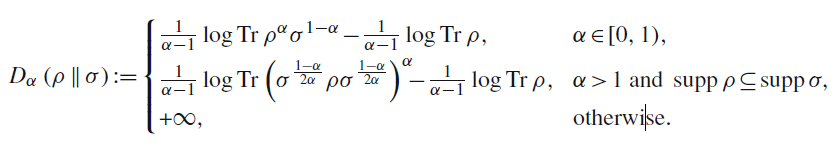

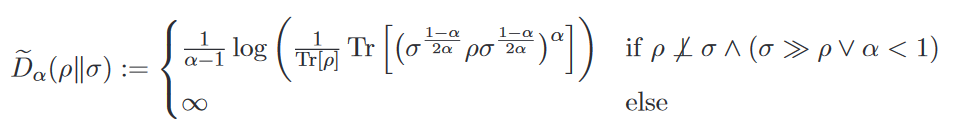

In [21]:
# Entropia de renyi

verbose_trace_dist = 0

Proceso_3 = '''
Entrada prediccion:
=======================
{}
Entrada true:
=======================
{}
=======================
=======================
Potencia:
=======================
{}
dm_true_elevada:
=======================
{}
Arg 1 (RHO * P * RHO):
=======================
{}
Traza 1:
=======================
{}
Arg 2 LOG(*):
=======================
{}
log:
=======================
{}
Divergencia:
=======================
{}
'''

def matrix_pow(p, power):
  eigenvalues, eigenvectors = np.linalg.eig(p)
  inverted_sqrt_eigenvalues = np.sign(eigenvalues) * (np.abs(eigenvalues)) ** (power)
  p_powered = np.dot(np.dot(eigenvectors, np.diag(inverted_sqrt_eigenvalues)), np.linalg.inv(eigenvectors))
  return p_powered

def Renyi_Divergence(dm_pred, dm_true):

  global verbose_trace_dist, alpha_R
  if dm_true[0,0] == 1:
    #print("Hola entre")
    #print(dm_true)
    p = 0.001
    X = np.array([[0,1],[1,0]])
    dm_true = (1 - p)*dm_true + p*np.dot(np.dot(X,dm_true),X)
  # sigma:
  power_a = (1-alpha_R)/(2*alpha_R)
  dm_true_powered = matrix_pow(dm_true, power_a)
  # product:
  arg_1 = np.dot(np.dot(dm_true_powered, dm_pred), dm_true_powered)
  # trace:
  tra = np.real(np.trace( matrix_pow(arg_1, alpha_R) ))
  # arg of log:
  arg_2 = (1/(np.real(np.trace(dm_pred)))) * tra
  # log:
  arg_3 = np.log(arg_2)
  # Divergece:
  D = (1/(alpha_R - 1)) * arg_3

  if verbose_trace_dist == 1:
    print(Proceso_3.format(dm_pred,
                         dm_true,
                         power_a,
                         dm_true_powered,
                         arg_1,
                         tra,
                         arg_2,
                         arg_3,
                        D))
    verbose_trace_dist = 0
  return D

La siguiente version se realizo haciendo un ajuste en la diagonal de la
$ρ_{true}$ debido a inestabilidades numericas a la hora de la inversion matricial.

In [22]:
# Entropia de renyi

verbose_trace_dist = 0

Proceso_3 = '''
Entrada prediccion:
=======================
{}
Entrada true:
=======================
{}
=======================
=======================
Potencia:
=======================
{}
dm_true_elevada:
=======================
{}
Arg 1 (RHO * P * RHO):
=======================
{}
Traza 1:
=======================
{}
Arg 2 LOG(*):
=======================
{}
log:
=======================
{}
Divergencia:
=======================
{}
'''

def matrix_pow(p, power):
  eigenvalues, eigenvectors = np.linalg.eig(p)
  inverted_sqrt_eigenvalues = np.sign(eigenvalues) * (np.abs(eigenvalues)) ** (power)
  p_powered = np.dot(np.dot(eigenvectors, np.diag(inverted_sqrt_eigenvalues)), np.linalg.inv(eigenvectors))
  return p_powered

def Renyi_Divergence_v2(dm_pred, dm_true):
  global verbose_trace_dist, alpha_R
  # check si la matriz tiene solo un 1 en su diagonal
  condicion_1 = np.count_nonzero(dm_true) == 1
  condicion_2 = np.array_equal(np.diag(np.diag(dm_true)), dm_true)
  if condicion_1 and condicion_2:
    #dm_true = dm_true.astype(np.float64)
    indice = np.where(np.diag(dm_true) == 1)[0][0]
    const = 0.999
    e = dm_true[indice,indice] - const
    nf,nc = dm_true.shape
    res = e/nf
    dm_true[np.diag_indices_from(dm_true)] = res
    dm_true[indice,indice] = const
  # sigma:
  power_a = (1-alpha_R)/(2*alpha_R)
  dm_true_powered = matrix_pow(dm_true, power_a)
  # product:
  arg_1 = np.dot(np.dot(dm_true_powered, dm_pred), dm_true_powered)
  # trace:
  tra = np.real(np.trace( matrix_pow(arg_1, alpha_R) ))
  # arg of log:
  arg_2 = (1/(np.real(np.trace(dm_pred)))) * tra
  # log:
  arg_3 = np.log(arg_2)
  # Divergece:
  D = (1/(alpha_R - 1)) * arg_3

  if verbose_trace_dist == 1:
    print(Proceso_3.format(dm_pred,
                         dm_true,
                         power_a,
                         dm_true_powered,
                         arg_1,
                         tra,
                         arg_2,
                         arg_3,
                        D))
    verbose_trace_dist = 0
  return D

### Clase Definitiva - DRU - Alto Nivel

In [23]:
class Modelo_DRU:

  def __init__(self, modelo, f_loss, num_layers = 10, learning_rate = 0.1,
               epochs = 10, batch_size = 32, n_clases = 3, n_qubits = 1,
               random_state = 42, save_process = True, entanglement = False,
               path_save_w0 = "", path_save_states_0="", file_name_w = "test_w",
               file_name_state = "test_states", val_prc = 0.3, features = 2,
               alpha_noise = 0.0, excel_file_experimente = 'resultados_clasificacion.xlsx',
               save_w_states = False, verbose_test = False, save_excel_result = False):

        self.modelo = modelo
        self.num_layers = num_layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.n_clases = n_clases
        self.state_labels = representatives(n_clases, n_qubits)

        self.ramdom_state = random_state
        np.random.seed(self.ramdom_state)
        # initialize random weights
        self.params = np.random.uniform(size=(self.num_layers, 3), requires_grad=True)
        self.bias = np.random.uniform(size=(self.num_layers, 3), requires_grad=True)
        # save states
        # funcion de costo:
        self.f_loss = f_loss
        self.save_process = save_process
        self.entanglement = entanglement
        self.alpha_noise = alpha_noise
        # save list:
        self.acc_train = []
        self.acc_test = []
        self.loss_list_train = []
        self.loss_list_test = []
        # porcentaje validadion
        self.prc_val = val_prc
        # paths to save:
        self.file_name_state = file_name_state
        self.file_name_w = file_name_w
        self.path_save_states_0 = path_save_states_0
        self.path_save_w0 = path_save_w0
        # self.features
        self.features = features
        # excel_file
        self.excel_file_experimente = excel_file_experimente
        # save w, state
        self.save_w_states = save_w_states
        self.verbose_test = verbose_test
        self.save_excel_result = save_excel_result


  def fit(self, X, y):
    # dividir train and validacion:
    # train and val
    self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
                     X, y, test_size = self.prc_val, random_state=self.ramdom_state)
    # aumentar con zeros:
    if self.features < 3:
      self.X_train = np.hstack((self.X_train, np.zeros((self.X_train.shape[0], 1), requires_grad=False)))
      self.X_val = np.hstack((self.X_val, np.zeros((self.X_val.shape[0], 1), requires_grad=False)))
    # guardar pesos y estados antes del entrenamiento
    if self.save_w_states == True:
      self.write_params(self.path_save_w0 + self.file_name_w + "_before_parameters.json")
      self.save_states(self.X_train, self.y_train, self.path_save_states_0 + self.file_name_state + "_before_states.json")
    # Entrenamiento por epocas:
    self.opt = qml.AdamOptimizer(self.learning_rate, beta1=0.9, beta2=0.999)
    for it in tqdm(range(self.epochs), desc="Epoch"):
      for Xbatch, ybatch in iterate_minibatches(self.X_train, self.y_train, batch_size=self.batch_size):
        self.params, self.bias = self.opt.step(
            lambda p, b: _cost(self.modelo,
                               p, Xbatch, ybatch, self.state_labels, b,
                               f_cost = self.f_loss, entanglement = self.entanglement, alpha_noise = self.alpha_noise),
            self.params, self.bias)
        if self.save_process == True:
          predicted_train = self.test(self.X_train, self.y_train)
          accuracy_train = self.score(self.y_train, predicted_train)
          predicted_test = self.test(self.X_val, self.y_val)
          accuracy_val = self.score(self.y_val, predicted_test)
          loss_train =  _cost(self.modelo, self.params, self.X_train, self.y_train, self.state_labels, self.bias,
                        f_cost = self.f_loss, entanglement = self.entanglement, alpha_noise = self.alpha_noise)
          loss_test =  _cost(self.modelo, self.params, self.X_val, self.y_val, self.state_labels, self.bias,
                        f_cost = self.f_loss, entanglement = self.entanglement, alpha_noise = self.alpha_noise)
          self.acc_train.append(accuracy_train)
          self.acc_test.append(accuracy_val)
          self.loss_list_train.append(loss_train)
          self.loss_list_test.append(loss_train)

    # Imprimir reporte final
    predicted_test = self.test(self.X_val, self.y_val)

    if self.verbose_test == True:
      print(classification_report(self.y_val, predicted_test))

    # Escribir resultado en excel:
    report_dict = classification_report(self.y_val, predicted_test, output_dict=True)
    mi_diccionario = self.report_to_dict(report_dict)

    if len(self.acc_train) == 0:
      predicted_train = self.test(self.X_train, self.y_train)
      accuracy_train = self.score(self.y_train, predicted_train)
      predicted_test = self.test(self.X_val, self.y_val)
      accuracy_val = self.score(self.y_val, predicted_test)
      loss_train =  _cost(self.modelo, self.params, self.X_train, self.y_train, self.state_labels, self.bias,
                    f_cost = self.f_loss, entanglement = self.entanglement, alpha_noise = self.alpha_noise)
      loss_test =  _cost(self.modelo, self.params, self.X_val, self.y_val, self.state_labels, self.bias,
                    f_cost = self.f_loss, entanglement = self.entanglement, alpha_noise = self.alpha_noise)
      self.acc_train.append(accuracy_train)
      self.acc_test.append(accuracy_val)
      self.loss_list_train.append(loss_train)
      self.loss_list_test.append(loss_train)

    acc_train_end = self.acc_train[-1]
    loss_train_end = self.loss_list_train[-1]
    loss_test_end = self.loss_list_test[-1]
    # save excel:
    if self.save_excel_result == True:
      self.dict_to_excel(mi_diccionario,
                        acc_train_end, loss_train_end, loss_test_end,
                        self.excel_file_experimente)

    # guardar pesos y estados despues del entrenamiento
    if self.save_w_states == True:
      self.save_states(self.X_train, self.y_train, self.path_save_states_0 + self.file_name_state+ "_after_states.json")
      self.write_params(self.path_save_w0 + self.file_name_w + "_after_parameters.json")

    return self.params, self.bias


  def test(self, X, y):
    predicted_train, fidel_train = _test(self.modelo, self.params, X, y,
                                         self.state_labels, self.bias,
                                         self.entanglement, alpha_noise = self.alpha_noise)
    return  predicted_train

  def score(self, y, predicted):
    accuracy_train = accuracy_score(y, predicted)
    return accuracy_train

  def save_states(self, X, y, path):
    states_4_q_enten_1 = test_intra_states(self.modelo, self.params, X, y,
                                           self.state_labels, self.bias,
                                           self.entanglement, alpha_noise = self.alpha_noise)
    w_r_json('w', path, file = states_4_q_enten_1)

  def write_params(self, path):
    # Crear un diccionario con los parámetros y sesgos
    params_dict = {"params": self.params.tolist(), "bias": self.bias.tolist()}
    # Escribir el diccionario en un archivo JSON
    with open(path, "w") as json_file:
        json.dump(params_dict, json_file)

  def report_to_dict(self, report):
    # Inicializa un diccionario para almacenar los resultados
    resultados_diccionario = {}

    # Agrega la métrica de accuracy al diccionario
    resultados_diccionario['accuracy'] = report['accuracy']

    # Itera a través de las claves del informe y guárdalas en el diccionario
    for clase, metricas in report.items():
        # Ignora la clave 'accuracy' que ya hemos agregado por separado
        if clase != 'accuracy':
            # Crea un diccionario para almacenar las métricas por clase
            metricas_clase = {}

            # Itera a través de las métricas para la clase actual
            for metrica, valor in metricas.items():
                # Crea una clave compuesta usando el nombre de la clase y el nombre de la métrica
                clave = f"{clase}_{metrica}"
                # Guarda el valor en el diccionario
                metricas_clase[clave] = valor

            # Guarda las métricas por clase en el diccionario general
            resultados_diccionario[clase] = metricas_clase

    return resultados_diccionario

  def dict_to_excel(self, mi_diccionario, acc_train_end, loss_train_end, loss_test_end, name_excel_file):
    # Supongamos que ya tienes el diccionario llamado 'mi_diccionario'
    # Puedes utilizar la función from_dict de pandas para convertir el diccionario en un DataFrame
    df_nuevo = pd.DataFrame.from_dict(mi_diccionario, orient='index')

    # Transpone el DataFrame para intercambiar filas y columnas
    df_nuevo_transpuesto = df_nuevo.transpose()

    # Expande los subdiccionarios y crea nuevas columnas para cada clave de los subdiccionarios
    df_nuevo_expandido = pd.json_normalize(df_nuevo_transpuesto.to_dict(), sep='_')

    # Colocar idenficador de prueba
    # self.idd = f"N_layers = {num_layers} + Noise = {alpha_noise} + f_cost = {f_loss.__name__}"
    df_nuevo_expandido["f_loss"] = self.f_loss.__name__
    df_nuevo_expandido["N_layers"] = self.num_layers
    df_nuevo_expandido["Noise"] = self.alpha_noise
    df_nuevo_expandido["end_train_accuracy"] = acc_train_end
    df_nuevo_expandido["end_train_loss"] =  loss_train_end
    df_nuevo_expandido["end_test_loss"] = loss_test_end

    # Nombre del archivo de Excel existente
    nombre_archivo_excel = name_excel_file

    try:
        # Intenta cargar el archivo Excel existente
        df_existente = pd.read_excel(nombre_archivo_excel)
    except FileNotFoundError:
        # Si el archivo no existe, crea un DataFrame vacío
        df_existente = pd.DataFrame()

    # Concatena el DataFrame existente con el nuevo DataFrame
    df_final = pd.concat([df_existente, df_nuevo_expandido], ignore_index=True)

    # Guarda el DataFrame combinado en el archivo de Excel
    df_final.to_excel(nombre_archivo_excel, index=False)

## Prueba

In [24]:
X, y =  make_IRIS_v2(3,3)

In [25]:
model = Modelo_DRU(qcircuit_1_qubit_mixed, Trace_Distance,
                        epochs = 2, n_clases = 3, n_qubits = 1,
                        features = 3, num_layers = 10, alpha_noise = 0.0, val_prc = 0.2,
                        save_process = False)
paramters_1q, bias_1q = model.fit(X, y)

Epoch: 100%|██████████| 2/2 [00:18<00:00,  9.23s/it]


# Spin Procesor


Esta seccion esta debida a dos clases la padre: Quantum_Spin_Proces que permite emular las condiciones fisicas del prosesador quantico basado en espines. y la clase CompositeGateProcessor donde se reunen todas las compuertas nativas (pulsos) y se las organiza para emular el circuito de data re uploading.

In [26]:
global_B0 = False
class Quantum_Spin_Proces:
    def __init__(self, h = 1, gir = 1.760e11, B0 = 10e-3, nf = 1, N_qubits = 1,J = 1, tf_noise = False,
                 noise_std = 0.01, B1_offset = 0, n_points_pulse_Ri = 100,
                 n_points_pulse_2Qbits = 100, n_swap = 1, T1 = 1e3, T2 = 1e3):
        #self.delt_t = delt_t
        #self.ω_x = (2*np.pi*n_f)/self.delt_t
        #self.g_e = g_e
        #self.u_b = u_b


        self.gir = gir
        self.B0 = B0
        self.Dt = -7

        self.h = h
        self.nf = nf
        self.N_qubits = N_qubits
        self.J = J
        self.tf_noise = tf_noise
        self.noise_std = noise_std
        self.B1_offset = B1_offset
        self.n_points_pulse_Ri = n_points_pulse_Ri
        self.n_points_pulse_2Qbits = n_points_pulse_2Qbits
        self.n_swap = n_swap
        self.global_time = 0
        self.dict_states = {}
        self.pulse_type = defaultdict(list)

        self.T1 = T1
        self.T2 = T2

    def Rz(self, alpha, ket_0, q_obj = 0, tf_expect = True):
      # Estados iniciales y qubit objetivo:
      self.q_obj = q_obj
      self.ket_0 = ket_0
      # parametros de compuerta:
      self.ω_x = 0
      self.ω_z = self.gir * self.B0
      alpha  = traducir_a_positivo(alpha)
      self.delt_t = (alpha)/self.ω_z
      self.B1 = 0
      self.O_x = self.gir*(self.B1/2)
      # solucion:
      out = self.Hamiltonian_solve(tf_expect)
      return out

    def Rx(self, alpha, ket_0, q_obj = 0, tf_expect = True):
      # Estados iniciales y qubit objetivo:
      self.q_obj = q_obj
      self.ket_0 = ket_0
      # parametros de compuerta:
      self.ω_x = self.gir * self.B0
      self.ω_z = self.gir * self.B0
      self.delt_t = (2*np.pi*self.nf)/self.ω_x
      self.B1 = (alpha * 2)/(self.gir * self.delt_t)
      self.O_x = self.gir*(self.B1/2)
      # solucion:
      out = self.Hamiltonian_solve(tf_expect)
      return out

    def Ry(self, alpha, ket_0, q_obj = 0, tf_expect = True):

      out_1 = self.Rx(np.pi/2, ket_0, q_obj=q_obj, tf_expect = False)
      end_state_1 = out_1.states[-1]
      out_2 = self.Rz(alpha, end_state_1,q_obj=q_obj, tf_expect = False)
      end_state_2 = out_2.states[-1]
      out_3 = self.Rx(-np.pi/2, end_state_2,q_obj=q_obj, tf_expect = False)
      end_state_3 = out_3.states[-1]
      if tf_expect == True:
        out_1_exp = self.Rx(np.pi/2, ket_0, q_obj=q_obj, tf_expect = True)
        out_2_exp = self.Rz(alpha, end_state_1,q_obj=q_obj, tf_expect = True)
        out_3_exp = self.Rx(-np.pi/2, end_state_2,q_obj=q_obj, tf_expect = True)
        out = [out_1_exp, out_2_exp, out_3_exp]
      else:
        out = out_3
      return out

    def H(self, ket_0, alpha = np.pi/2, q_obj = 0, tf_expect = True):
      out_1 = self.Rz(np.pi/2, ket_0, q_obj=q_obj, tf_expect = False)
      end_state_1 = out_1.states[-1]
      out_2 = self.Rx(alpha, end_state_1,q_obj=q_obj, tf_expect = False)
      end_state_2 = out_2.states[-1]
      out_3 = self.Rz(np.pi/2, end_state_2,q_obj=q_obj, tf_expect = False)
      end_state_3 = out_3.states[-1]
      if tf_expect == True:
        out_1_exp = self.Rz(np.pi/2, ket_0, q_obj=q_obj, tf_expect = True)
        out_2_exp = self.Rx(alpha, end_state_1,q_obj=q_obj, tf_expect = True)
        out_3_exp = self.Rz(np.pi/2, end_state_2,q_obj=q_obj, tf_expect = True)
        out = [out_1_exp, out_2_exp, out_3_exp]
      else:
        out = out_3
      return out

    def SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True):
      self.q_obj = q_obj
      self.ket_0 = ket_0
      self.Dt = np.pi/(self.J*self.n_swap)
      self.measure = measure_op
      self.qobj = Qobj(self.measure, dims=[[2,2],[2,2]])
      self.out = self.Hamiltonian_solve_excharge(tf_expectt)
      return self.out

    def sqrt_SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True):
      self.q_obj = q_obj
      self.ket_0 = ket_0
      self.Dt = (np.pi/(2*self.J*self.n_swap))
      self.measure = measure_op
      self.qobj = Qobj(self.measure, dims=[[2,2],[2,2]])
      self.out = self.Hamiltonian_solve_excharge(tf_expectt)
      return self.out

    def CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False):
      self.q_obj = q_obj
      q_control , q_target = q_obj
      state_1 = self.Ry(np.pi/2, ket_0, q_obj = q_target, tf_expect = False).states[-1]
      state_2 = self.sqrt_SWAP(state_1, [], q_obj = q_obj, tf_expectt = False).states[-1]
      state_3 = self.Rz(np.pi, state_2, q_obj = q_control, tf_expect = False).states[-1]
      state_4 = self.sqrt_SWAP(state_3, [], q_obj= q_obj, tf_expectt = False).states[-1]
      state_5 = self.Rz(-np.pi/2, state_4, q_obj = q_control, tf_expect = False).states[-1]
      state_6 = self.Rz(-np.pi/2, state_5, q_obj = q_target, tf_expect = False).states[-1]
      state_7 = self.Ry(-np.pi/2, state_6, q_obj = q_target, tf_expect = False).states[-1]
      return state_7

    def CZ(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False):
      self.q_obj = q_obj
      q_control , q_target = q_obj
      state_2 = self.sqrt_SWAP(ket_0, [], q_obj = q_obj, tf_expectt = False).states[-1]
      state_3 = self.Rz(-np.pi, state_2, q_obj = q_control, tf_expect = False).states[-1]
      state_4 = self.sqrt_SWAP(state_3, [], q_obj = q_obj, tf_expectt = False).states[-1]
      state_5 = self.Rz(np.pi/2, state_4, q_obj = q_control, tf_expect = False).states[-1]
      state_6 = self.Rz(-np.pi/2, state_5, q_obj = q_target, tf_expect = False).states[-1]
      return state_6

    def Hamiltonian_solve(self, tf_expect = True):
      # Hamiltonian H0
      h0_constant = - (self.h/2) * (self.ω_x) # + (self.h/2) * (self.ω_z)
      h1_constant =   (self.h/2) * (self.ω_z)
      h2_constant =   (self.h/2) * (self.O_x)
      if self.N_qubits > 1:
        apply_qbit_z = []
        apply_qbit_x = []
        for i in range(self.N_qubits):
          if i == self.q_obj:
            apply_qbit_z.append(sigmaz())
            apply_qbit_x.append(sigmax())
          else:
            apply_qbit_z.append(qeye(2))
            apply_qbit_x.append(qeye(2))
      else:
        apply_qbit_z = [sigmaz()]
        apply_qbit_x = [sigmax()]
      H0 = h0_constant * tensor(*apply_qbit_z)
      H1 = h1_constant * tensor(*apply_qbit_z)
      H2 = h2_constant * tensor(*apply_qbit_x)

      # Correccion de desviacion estandar:
      if self.B1 != 0:
        dv = self.noise_std/abs(self.B1)
      else:
        dv = 0
      self.args = { "t_init": 0, "t_final": self.delt_t, "std_noise": dv}
      self.tlist  = np.linspace(0, self.delt_t, self.n_points_pulse_Ri)
      # Hamiltonian
      if self.tf_noise == False:
        H = [H0, [H1, pulse_z], [H2, pulse_x]]
        # Guardar pulso:
        t_actual = self.global_time
        t_final = self.global_time + self.delt_t
        self.pulse_type[self.q_obj].append({
            "Type_pulse": "Unitary",
            "B0": self.B0,
            "B1": self.B1,
            "Delt_t": self.delt_t,
            "t_i": t_actual,
            "t_f": t_final,
            "Noise": ""
        })
        self.global_time += self.delt_t
      else:
        #print("Entre con ruido!")
        noise_x = pulse_x_with_noise(self.tlist, self.args)
        S_x = Cubic_Spline(self.tlist[0], self.tlist[-1], noise_x)
        #noise_z = pulse_z_with_noise(self.tlist, self.args)
        #S_z = Cubic_Spline(self.tlist[0], self.tlist[-1], noise_z)
        H = [H0, [H1, pulse_z], [H2, S_x]]
        # Guardar pulso
        t_actual = self.global_time
        t_final = self.global_time + self.delt_t
        self.pulse_type[self.q_obj].append(
                         {
                          "Type_pulse": "Unitary",
                          "B0": self.B0,
                          "B1": self.B1,
                          "Delt_t": self.delt_t,
                          "t_i": t_actual,
                          "t_f": t_final,
                          "Noise": {
                              "S_z": 0,
                              "S_x": S_x
                          }
                        })
        self.global_time += self.delt_t
      if tf_expect:
        if self.N_qubits > 1:
          apply_qbit_e_ops = []
          for i in range(self.N_qubits):
            if i == self.q_obj:
              apply_qbit_e_ops.append(sigmaz())
            else:
              apply_qbit_e_ops.append(qeye(2))
          e_ops = [tensor(*apply_qbit_e_ops)]
        else:
          e_ops = [sigmax(), sigmay(), sigmaz()]
      else:
        e_ops = []
      c_ops = []
      self.output_rwa = mesolve(H, self.ket_0, self.tlist, c_ops, e_ops, self.args)
      return self.output_rwa

    def Hamiltonian_solve_excharge(self, tf_expect = True):
      delt_t = self.Dt
      Si, Sj = self.q_obj
      if self.N_qubits > 1:
        apply_qbit_z = []
        apply_qbit_x = []
        apply_qbit_y = []
        for i in range(self.N_qubits):
          if i == Si or i == Sj:
            apply_qbit_z.append(sigmaz())
            apply_qbit_x.append(sigmax())
            apply_qbit_y.append(sigmay())
          else:
            apply_qbit_z.append(qeye(2))
            apply_qbit_x.append(qeye(2))
            apply_qbit_y.append(qeye(2))

      H = ((self.J * self.h**2)/4)*(tensor(*apply_qbit_x) + tensor(*apply_qbit_y) + tensor(*apply_qbit_z))

      #H = (self.J/4)*(tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))
      qobj = Qobj(self.measure, dims=[[2,2],[2,2]])
      h_t = [H, pulse_x]

      # Correccion de desviacion estandar:
      if self.B1 != 0:
        dv = self.noise_std/abs(self.B1)
      else:
        dv = 0

      self.args = { "t_init": 0, "t_final": delt_t, "std_noise": self.noise_std/self.B1}
      #self.args = {"t_init":0, "t_final": delt_t, "noise": True}
      c_ops = []
      if tf_expect:
        e_ops = [qobj]
      else:
        e_ops = []
      self.tlist  = np.linspace(0, delt_t, self.n_points_pulse_2Qbits)
      # Save pulses
      t_actual = self.global_time
      t_final = self.global_time + delt_t
      self.pulse_type[f'I_{self.q_obj[0]}-{self.q_obj[1]}'].append(
                         {
                            "Type_pulse": "Two_Qubits",
                            "Q_bits_target":self.q_obj,
                            "J": self.J,
                            "Delt_t": self.Dt,
                            "t_i": t_actual,
                            "t_f": t_final,
                            "Noise": ""
                          })
      self.global_time += self.Dt
      self.output = mesolve(h_t, self.ket_0, self.tlist, c_ops, e_ops, self.args)
      return self.output

    def plot_expect(self, out, ry_tf = False):
      ## create Bloch sphere instance ##
      if ry_tf == False:
        fig = plt.figure(constrained_layout=True)
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        b=Bloch()
        b.axes = ax1
        b.fig = fig
        ## normalize colors to times in tlist ##
        nrm = mpl.colors.Normalize(0, self.delt_t)
        colors = cm.jet(nrm(self.tlist))
        ## add data points from expectation values ##
        b.add_points([out.expect[0],out.expect[1],out.expect[2]],'m')
        ## customize sphere properties ##
        b.point_color=list(colors)
        b.point_marker=['o']
        b.point_size=[8]
        b.view=[-9,11]
        b.zlpos=[1.1,-1.2]
        b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
        ## plot sphere ##
        b.render()
        ## Add color bar ##
        sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
        sm.set_array([])  # You need to set a dummy array for the right scaling
        cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
        cbar.set_label('Time [s]')
        plt.show()
      else:
        fig = plt.figure(constrained_layout=True)
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        b=Bloch()
        b.axes = ax1
        b.fig = fig
        ## normalize colors to times in tlist ##
        nrm = mpl.colors.Normalize(0, self.delt_t)
        colors = cm.jet(nrm(self.tlist))
        ## add data points from expectation values ##
        for i in range(len(out)):
          b.add_points([out[i].expect[0], out[i].expect[1], out[i].expect[2]],'m')
        ## customize sphere properties ##
        b.point_color=list(colors)
        b.point_marker=['o']
        b.point_size=[8]
        b.view=[-9,11]
        b.zlpos=[1.1,-1.2]
        b.zlabel=['$\left|0\\right>_{f}$','$\left|1\\right>_{f}$']
        ## plot sphere ##
        b.render()
        ## Add color bar ##
        sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=nrm)
        sm.set_array([])  # You need to set a dummy array for the right scaling
        cbar = plt.colorbar(sm, ax = ax1, orientation='vertical', shrink=0.5)
        cbar.set_label('Time [s]')
        plt.show()

    def plot_excharges(self, out, index, ry_tf = False):

      labels_axis = ["X","Y","Z"]
      # Grafica del valor esperado:
      if ry_tf == False:
        plt.figure(figsize=(6, 2))
        # Subplot para el valor esperado
        plt.subplot(1, 1, 1)  # 2 filas, 1 columna, primer subplot
        plt.plot(self.tlist, out.expect[index])
        plt.title(f'Valor Esperado \n Eje {labels_axis[index]}')
        plt.xlabel('Tiempo')
        plt.ylabel('Valor Esperado')
        plt.grid(True)
      else:
        time = list(self.tlist) + list(self.tlist) + list(self.tlist)
        Ntime = len(time)
        tt = np.linspace(0,3e-9,Ntime)
        y = list(out[0].expect[index]) + list(out[1].expect[index]) + list(out[2].expect[index])
        plt.figure(figsize=(6, 2))
        # Subplot para el valor esperado
        plt.subplot(1, 1, 1)  # 2 filas, 1 columna, primer subplot
        plt.plot(tt, y)
        plt.title(f'Valor Esperado \ Eje {labels_axis[index]}')
        plt.xlabel('Tiempo')
        plt.ylabel('Valor Esperado')
        plt.grid(True)
      plt.show()
      print("\n")
      # Grafica del pulso:
      if self.tf_noise == False:
        if self.Dt == -7:
          # Subplot para el pulso
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B0 * pulse_z(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
          # Subplot para el pulso
          plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B1 * pulse_x(self.tlist, self.args))
          plt.title('Pulso B1')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
        else:
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.J * pulse_z(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)

      else:
        if self.Dt == -7:
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B0 * pulse_z_with_noise(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
          # Subplot para el pulso
          plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.B1 * pulse_x_with_noise(self.tlist, self.args))
          plt.title('Pulso B1')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
        else:
          plt.figure(figsize=(4, 3))
          plt.subplot(2, 1, 1)  # 2 filas, 1 columna, segundo subplot
          plt.plot(self.tlist, self.J * pulse_z(self.tlist, self.args))
          plt.title('Pulso B0')
          plt.xlabel('Tiempo')
          plt.ylabel('Amplitud')
          plt.grid(True)
      # Ajustar el espacio entre los subgráficos para evitar solapamiento
      plt.tight_layout()
      # Mostrar el gráfico
      plt.show()

In [27]:
class CompositeGateProcessor(Quantum_Spin_Proces):
  def __init__(self, nf=4, h=1, gir =1.760e11, B0=10e-3, N_qubits=1, J=1, tf_noise=False,
                 noise_std=0.01, B1_offset=0, n_points_pulse_Ri=100, n_points_pulse_2Qbits=100, n_swap=1, T1=1e3, T2 = 1e3,
                ket_dru_0 = basis(2, 0)):  # Puedes añadir nuevos parámetros si es necesario
      super().__init__(h, gir, B0, nf, N_qubits,J, tf_noise,
                 noise_std, B1_offset, n_points_pulse_Ri,
                 n_points_pulse_2Qbits, n_swap, T1, T2)
      self.ket_dru_0 = ket_dru_0

  def qcircuit_DRU_1_Qubit(self, params, x, bias=None, entanglement=False):
    for i,p in enumerate(params):
        arg = np.multiply(p,x) + bias[i]
        arg1, arg2, arg3 = arg
        #print(type(arg1), type(arg2), type(arg3))
        #print(arg1, arg2, arg3)
        self.ket_dru_0 = self.RzRyRz(float(arg3), float(arg1), float(arg2), self.ket_dru_0, tf_expect=False)
        self.dict_states[f"ket_1_qubit_{i}"] = self.ket_dru_0.full()
    return self.ket_dru_0

  def qcircuit_DRU_2_Qubit(self, params, x, bias=None, entanglement=False):
    n_layer = len(params) // 2
    print(f"N_layers = {n_layer}")
    print(f"params_shape = {params.shape}")
    print(f"params_shape = {bias.shape}")
    for i in range(n_layer):
      arg_1 = np.multiply(params[i],x) + bias[i]
      arg_1_1, arg_1_2, arg_1_3 = arg_1
      arg_2 = np.multiply(params[i + n_layer],x) + bias[i + n_layer]
      arg_2_1, arg_2_2, arg_2_3 = arg_2
      #print(type(arg1), type(arg2), type(arg3))
      #print(arg1, arg2, arg3)
      self.ket_dru_0 = self.RzRyRz(float(arg_1_1), float(arg_1_2), float(arg_1_3), self.ket_dru_0, q_obj=0, tf_expect=False)
      self.ket_dru_0 = self.RzRyRz(float(arg_2_1), float(arg_2_2), float(arg_2_3), self.ket_dru_0, q_obj=1, tf_expect=False)
      #qml.Snapshot(f"ket_2_qubits_{i}")
      self.dict_states[f"ket_2_qubits_{i}"] = self.ket_dru_0.full()
      if entanglement == True:
        # CZ(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
        #self.ket_dru_0 = self.CZ(wires=[0,1])
        self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [0,1])
        self.dict_states[f"ket_2_qubits_entanglement_{i}"] = self.ket_dru_0.full()
        #qml.Snapshot(f"ket_2_qubits_entanglement{i}")
    return self.ket_dru_0

  def qcircuit_DRU_4_Qubit(self, params, x, bias=None, entanglement=False):
    n_layer = len(params) // 4
    #n_entenglaments = 0
    for i in range(n_layer):
      print(f"Contador general {i}")
      arg_1 = np.multiply(params[i],x) + bias[i]
      arg_2 = np.multiply(params[i + n_layer],x) + bias[i + n_layer]
      arg_3 = np.multiply(params[i + 2*n_layer],x) + bias[i + 2*n_layer]
      arg_4 = np.multiply(params[i + 3*n_layer],x) + bias[i + 3*n_layer]

      arg_1_1, arg_1_2, arg_1_3 = arg_1
      arg_2_1, arg_2_2, arg_2_3 = arg_2
      arg_3_1, arg_3_2, arg_3_3 = arg_3
      arg_4_1, arg_4_2, arg_4_3 = arg_4

      self.ket_dru_0 = self.RzRyRz(float(arg_1_1), float(arg_1_2), float(arg_1_3), self.ket_dru_0, q_obj=0, tf_expect=False)
      self.ket_dru_0 = self.RzRyRz(float(arg_2_1), float(arg_2_2), float(arg_2_3), self.ket_dru_0, q_obj=1, tf_expect=False)
      self.ket_dru_0 = self.RzRyRz(float(arg_3_1), float(arg_3_2), float(arg_3_3), self.ket_dru_0, q_obj=2, tf_expect=False)
      self.ket_dru_0 = self.RzRyRz(float(arg_4_1), float(arg_4_2), float(arg_4_3), self.ket_dru_0, q_obj=3, tf_expect=False)
      self.dict_states[f"ket_4_qubits_{i}"] = self.ket_dru_0.full()
      #qml.Snapshot(f"ket_4_qubits_{i}")
      if entanglement == True:
        if i % 2 == 0 and i < n_layer-1:
          print(f"Entro par en {i}")
          # par:
          #qml.CZ(wires=[0,1])
          #qml.CZ(wires=[2,3])
          self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [0,1])
          self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [2,3])
          self.dict_states[f"ket_4_qubits_entanglement_par{i}"] = self.ket_dru_0.full()
          #qml.Snapshot(f"ket_4_qubits_entanglement_par{i}")
          #n_entenglaments += 1
        elif i < n_layer-1:
          print(f"Entro impar en {i}")
          # impar:
          #qml.CZ(wires=[1,2])
          #qml.CZ(wires=[0,3])
          # def CZ(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False):
          # 👁 OJITOOOOO
          self.ket_dru_0 = self.CZ(self.ket_dru_0, [], q_obj = [1,2], tf_expectt =False)
          self.ket_dru_0 = self.CZ_4(self.ket_dru_0, q_obj=[0,3], tf_expect=False)
          self.dict_states[f"ket_4_qubits_entanglement_impar{i}"] = self.ket_dru_0.full()
          #qml.Snapshot(f"ket_4_qubits_entanglement_impar{i}")
          #n_entenglaments += 1
    #verb = 1
    #if verb == 1:
    #  print(f"n_entenglaments = {n_entenglaments}")
    #  verb = 0
    return self.ket_dru_0

  def RzRyRz(self, alpha, beta, gamma, ket_0, q_obj=0, tf_expect=True):
        rz_result = self.Rz(alpha, ket_0, q_obj=q_obj, tf_expect=False)
        end_state_rz = rz_result.states[-1]

        rx_result = self.Ry(beta, end_state_rz, q_obj=q_obj, tf_expect=False)
        end_state_rx = rx_result.states[-1]

        ry_result = self.Rz(gamma, end_state_rx, q_obj=q_obj, tf_expect=False)
        end_state_ry = ry_result.states[-1]

        if tf_expect:
            rz_result_exp = self.Rz(alpha, ket_0, q_obj=q_obj, tf_expect=True)
            rx_result_exp = self.Ry(beta, end_state_rz, q_obj=q_obj, tf_expect=True)
            ry_result_exp = self.Rz(gamma, end_state_rx, q_obj=q_obj, tf_expect=True)
            return [rz_result_exp, rx_result_exp, ry_result_exp]
        else:
            return end_state_ry

  def CZ_4(self, ket_0, q_obj=[0,3], tf_expect=True):
    # H(self, ket_0, alpha = np.pi/2, q_obj = 0, tf_expect = True)
    print(q_obj)
    q_objetivo, q_target = q_obj
    state_1 = self.H(ket_0, q_obj = q_target, tf_expect = tf_expect).states[-1]
    state_2 = self.CNOT_4(state_1, tf_expect = tf_expect)
    state_3 = self.H(state_2, q_obj = q_target, tf_expect = tf_expect).states[-1]
    return state_3

  def CNOT_4(self, ket_0, q_obj=[0,3], tf_expect=True):
    # SWAP(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = True)
    # CNOT(self, ket_0, measure_op, q_obj = [0,1], tf_expectt = False)
    q_objetivo, q_target = q_obj
    state_1 = self.SWAP(ket_0, [], q_obj =   [2,3], tf_expectt = tf_expect).states[-1]
    state_2 = self.SWAP(state_1, [], q_obj = [0,1], tf_expectt = tf_expect).states[-1]
    state_3 = self.CNOT(state_2, [], q_obj = [1,2], tf_expectt = tf_expect)
    state_4 = self.SWAP(state_3, [], q_obj = [0,1], tf_expectt = tf_expect).states[-1]
    state_5 = self.SWAP(state_4, [], q_obj = [2,3], tf_expectt = tf_expect).states[-1]
    return state_5

## Prueba Borrador

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=1000, N_qubits = 1, tf_noise = False, noise_std = 0.0000)
state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q, model.X_val[1], bias=bias_1q)
state_dru

NameError: name 'paramters_1q' is not defined

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=1000, N_qubits = 1, tf_noise = True, noise_std = 0.0000)
state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q, model.X_val[1], bias=bias_1q)
state_dru

In [ ]:
dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=1000, N_qubits = 1, tf_noise = True, noise_std = 0.01)
state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q, model.X_val[1], bias=bias_1q)
state_dru

# Seccion I

Esta sección se utiliza para entrenar el modelo base line, extraer los parametros y bias optimo y "montarlos" en el procesador cuantico con el fin de que ante nueva data el procesador cuantico pueda clasificarla con los pesos y bias entrenados:

In [ ]:
# Entrenamiento de base line:

X, y =  make_IRIS_v2(3,3)
model = Modelo_DRU(qcircuit_1_qubit_mixed, fidelity_cost,
                        epochs = 12, n_clases = 3, n_qubits = 1,
                        features = 3, num_layers = 10, alpha_noise = 0.0,
                        val_prc = 0.3,
                        save_process = False)
paramters_1q, bias_1q = model.fit(X, y)

[-0.18962247 -0.68028676 -0.30642056]


Epoch: 100%|██████████| 12/12 [01:25<00:00,  7.14s/it]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[-0.18962247 -0.68028676 -0.30642056]


In [ ]:
# Obtener el X test y y test utilizados:
X_test = model.X_val
y_test = model.y_val

In [ ]:
# Cargar los pesos y bias entrenados y junto con la nueva data
# evidenciar el desempeño en el procesador cuantico:

y_pred = []
y_pred_states = []
for x in X_test:
  dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=100,
                                     N_qubits = 1, tf_noise = False, noise_std = 0.0000)
  state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q, x, bias=bias_1q)
  y_pred_states.append(state_dru)
  dm_out = density_matrix(state_dru.full())
  clas_pred = _test_pulse_model(dm_out, model.state_labels)
  y_pred.append(clas_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# Exportar a excel los resultados:
report_dict = classification_report(y_test, y_pred, output_dict = True)
write = report_to_excel(report_dict, "Save_excel.xlsx")
write.dict_to_excel(1, False, 0.0, dru_circuit.B0, dru_circuit.B1,
                    10, False,
                    fidelity_cost, 1e3, 1e3, 0.0)

## Pruena completa

### 1 qubit

In [ ]:
import pandas as pd
# data set:
X, y =  make_IRIS_v2(3,3)

In [ ]:
from itertools import product
import random

# Tus listas
f_cost_list = [Trace_Distance_v3, fidelity_cost, Von_Neumman_Divergence_v2, Renyi_Divergence_v2]
Noise_range = [0.0, 0.3, 0.5, 0.9]
N_layers = [3, 5, 10]
B0 = [1e-3, 10e-3, 1]
tf_noise = [True]
noise_std = [0.0, 1e-3, 1e-2, 1e-1, 1, 5]

# Generar todas las combinaciones posibles
all_combinations = list(product(f_cost_list, Noise_range, N_layers, B0, tf_noise, noise_std))

# Barajar aleatoriamente las combinaciones
random.shuffle(all_combinations)

# Conjunto para realizar un seguimiento de las combinaciones utilizadas
used_combinations = set()

N = 70

# Realizar las pruebas
for i in range(N):

  combination = all_combinations[i]
  f_cost_i, q_noise,  n_layers, B0, tf_noise, noise_std = combination

  if combination not in used_combinations:

    model = Modelo_DRU(qcircuit_1_qubit_mixed, f_cost_i,
                          epochs = 12, n_clases = 3, n_qubits = 1,
                          features = 3, num_layers = n_layers, alpha_noise = q_noise,
                          save_process = False)
    paramters_1q, bias_1q = model.fit(X, y)
    X_test = model.X_val
    y_test = model.y_val
    y_pred = []

    for x in X_test:
      dru_circuit = CompositeGateProcessor(n_points_pulse_Ri=100,
                                        N_qubits = 1, tf_noise = tf_noise, noise_std = noise_std)
      state_dru = dru_circuit.qcircuit_DRU_1_Qubit(paramters_1q, x, bias=bias_1q)
      dm_out = density_matrix(state_dru.full())
      clas_pred = _test_pulse_model(dm_out, model.state_labels)
      y_pred.append(clas_pred)

    report_dict = classification_report(y_test, y_pred, output_dict = True)
    write = report_to_excel(report_dict, "Save_excel_1q_iris_3_3.xlsx")
    write.dict_to_excel(1, tf_noise, noise_std, dru_circuit.B0, dru_circuit.B1,
                        n_layers, False,
                        f_cost_i, dru_circuit.T1, dru_circuit.T2, q_noise)

    # Agregar la combinación al conjunto de utilizadas
    used_combinations.add(combination)


Epoch: 100%|██████████| 12/12 [00:58<00:00,  4.85s/it]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch: 10

# Seccion II


## Pulsos

Grafica de pulsos del procesador:

In [ ]:
def plot_pulses(self, verbose = 1, key_show = 'all'):
  resultado = self.pulse_type
  for key in resultado:
    list_pulses = resultado[key]
    if list_pulses[0]['Type_pulse'] == 'Unitary':
      time = []
      B0_pulses = []
      B1_pulses = []
      t0 = 0
      for dict_pulse in list_pulses:
        # Crear tiempo:
        time_i = np.linspace(t0, t0 + dict_pulse['Delt_t'], 100)
        time += list(time_i)
        t0 = time[-1]
        # Crear datos para B0:
        args1 = {"t_init":0, "t_final":dict_pulse['Delt_t']}
        B0_i = dict_pulse['B0'] * pulse_x(
                                        np.linspace(0,dict_pulse['Delt_t'], 100),
                                        args1)
        B0_pulses += list(B0_i)
        # Crear datos para B1:
        args2= {"t_init":0, "t_final":dict_pulse['Delt_t']}
        B1_i = dict_pulse['B1'] * pulse_x(
                                        np.linspace(0,dict_pulse['Delt_t'],100),
                                        args2)
        B1_pulses += list(B1_i)
      # Show grafica
      plt.figure(figsize=(8,3))
      plt.plot(time, B0_pulses)
      plt.show()
      plt.figure(figsize=(8,3))
      plt.plot(time, B1_pulses)
      plt.show()

    elif list_pulses[0]['Type_pulse'] == "Two_Qubits":
      time = []
      Interaction = []
      t0 = 0
      for dict_pulse in list_pulses:
        # Crear tiempo:
        time_i = np.linspace(t0, t0 + dict_pulse['Delt_t'], 100)
        time += list(time_i)
        t0 = time[-1]
        # Crear datos para B0:
        args1 = {"t_init":0, "t_final":dict_pulse['Delt_t']}
        Interaction_i = dict_pulse["J"] * pulse_x(
                                          np.linspace(0,dict_pulse['Delt_t'], 100),
                                          args1)
        Interaction += list(Interaction_i)
      # Show grafica
      plt.figure(figsize=(8,3))
      plt.plot(time, Interaction)
      plt.show()

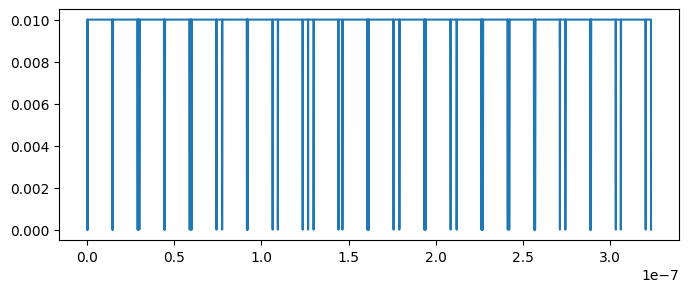

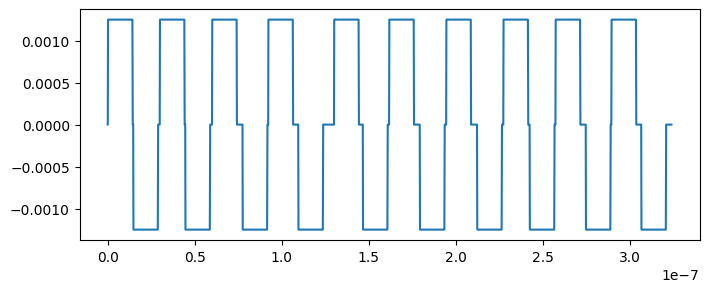

In [ ]:
plot_pulses(dru_circuit)

## Fidelidades

Calculo de fidelidades de los estados cuanticos en el base line y el procesador de espines

In [ ]:
path_before = "/content/drive/MyDrive/Tesis/1_qubit_iris_3_3_before.json"
abefore, dict_samples_before_1_qubit = w_r_json('r', path_before)

In [ ]:
len(dict_samples_before_1_qubit)

105

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
np.random.seed(42)
num_layers = 10
# initialize random weights
params = np.random.uniform(size=(num_layers, 3), requires_grad=True)
bias = np.random.uniform(size=(num_layers, 3), requires_grad=True)

In [ ]:
len(model.X_train)

X, y =  make_IRIS_v2(3,3)
len(X)

In [ ]:
#dru_circuit_1_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 1)
list_dict_states_spin_dru = []
for xi in model.X_train:
  #print(xi)
  dru_circuit_1_q = CompositeGateProcessor(n_points_pulse_Ri=100, N_qubits = 1)
  state_dru = dru_circuit_1_q.qcircuit_DRU_1_Qubit(params, xi, bias=bias)
  list_dict_states_spin_dru.append(dru_circuit_1_q.dict_states)

In [ ]:
dict_samples_before_1_qubit

[{'ket_1_qubit_0': tensor([0.91596724+0.30124646j, 0.26173364-0.04183407j], requires_grad=True),
  'ket_1_qubit_1': tensor([0.67147391-0.39437603j, 0.55770115+0.28733214j], requires_grad=True),
  'ket_1_qubit_2': tensor([0.61083621-0.46871904j, 0.6094426 +0.18910659j], requires_grad=True),
  'ket_1_qubit_3': tensor([0.43459178-0.58280102j, 0.65656169+0.20099675j], requires_grad=True),
  'ket_1_qubit_4': tensor([0.15564561-0.71603006j, 0.45098113+0.50959926j], requires_grad=True),
  'ket_1_qubit_5': tensor([-0.13066032-0.87057631j,  0.32561532+0.34496294j], requires_grad=True),
  'ket_1_qubit_6': tensor([-0.47394592-0.83995381j,  0.06244842+0.25681327j], requires_grad=True),
  'ket_1_qubit_7': tensor([-0.87963452-0.35570275j, -0.30258097-0.09035164j], requires_grad=True),
  'ket_1_qubit_8': tensor([-0.82428797-0.15264755j, -0.47121037-0.27424232j], requires_grad=True),
  'ket_1_qubit_9': tensor([-0.80203003-0.15127625j, -0.51769131-0.25663014j], requires_grad=True),
  'execution_results

In [ ]:
list_dict_states_spin_dru

[{'ket_1_qubit_0': array([[-0.91634864+0.27170018j],
         [ 0.29406959+0.00269513j]]),
  'ket_1_qubit_1': array([[ 0.1614873 -0.78145455j],
         [-0.59269214-0.10939227j]]),
  'ket_1_qubit_2': array([[-0.22923792-0.7356653j ],
         [-0.45827031-0.44298404j]]),
  'ket_1_qubit_3': array([[ 0.55195042+0.79136802j],
         [-0.22742489-0.13177751j]]),
  'ket_1_qubit_4': array([[0.02421566-0.0250819j ],
         [0.29938489+0.95349525j]]),
  'ket_1_qubit_5': array([[ 0.00358673-0.0696607j ],
         [-0.20617281+0.97602628j]]),
  'ket_1_qubit_6': array([[0.2912052-0.26830143j],
         [0.6984733-0.5961115j ]]),
  'ket_1_qubit_7': array([[-0.17840418-0.28991163j],
         [ 0.91664794+0.20947494j]]),
  'ket_1_qubit_8': array([[-0.10624095+0.21391256j],
         [-0.60319253-0.76099477j]]),
  'ket_1_qubit_9': array([[0.38566617+0.37349218j],
         [0.25253019+0.80498056j]])},
 {'ket_1_qubit_0': array([[-0.64913779+0.74718622j],
         [ 0.11871385+0.07899307j]]),
  'ket

In [ ]:
N_states_bl = len(dict_samples_before_1_qubit)
N_states_spin = len(list_dict_states_spin_dru)
print(f"N sates base line {N_states_bl} \n N sates spin {N_states_spin}")
dict_states_fidelities = []
for i in range(N_states_bl):
  dict_bl = dict_samples_before_1_qubit[i]
  dict_spin = list_dict_states_spin_dru[i]
  if i > 2:
    break


N sates base line 105 
 N sates spin 120


In [ ]:
dict_bl

{'ket_1_qubit_0': tensor([0.87938035-0.14030223j, 0.43121524+0.14511686j], requires_grad=True),
 'ket_1_qubit_1': tensor([0.02599467-0.62706207j, 0.72012261+0.29587306j], requires_grad=True),
 'ket_1_qubit_2': tensor([-0.36335682-0.62924371j,  0.51656867+0.45296908j], requires_grad=True),
 'ket_1_qubit_3': tensor([-0.65128077-0.72426689j,  0.18042078+0.13681803j], requires_grad=True),
 'ket_1_qubit_4': tensor([-0.95617484-0.24339019j, -0.05711067-0.15241152j], requires_grad=True),
 'ket_1_qubit_5': tensor([-0.87061442+0.18097146j, -0.37787226-0.25786122j], requires_grad=True),
 'ket_1_qubit_6': tensor([-0.45305408+0.68572946j, -0.5358264 -0.19340936j], requires_grad=True),
 'ket_1_qubit_7': tensor([ 0.47721193+0.75524757j, -0.39371288-0.21647181j], requires_grad=True),
 'ket_1_qubit_8': tensor([ 0.93548162+0.29182289j, -0.18249834+0.0800493j ], requires_grad=True),
 'ket_1_qubit_9': tensor([0.98682282+0.00137384j, 0.11902415+0.10959966j], requires_grad=True),
 'execution_results': tens

In [ ]:
dict_spin

{'ket_1_qubit_0': array([[-0.96994122+0.15869227j],
        [ 0.18442831+0.0041228j ]]),
 'ket_1_qubit_1': array([[ 0.40351593-0.81358661j],
        [-0.40313232-0.11285414j]]),
 'ket_1_qubit_2': array([[ 0.05586849-0.88723554j],
        [-0.30911816-0.33784281j]]),
 'ket_1_qubit_3': array([[0.34069748+0.90744662j],
        [0.03104806-0.24393007j]]),
 'ket_1_qubit_4': array([[-0.3384844 -0.05720181j],
        [-0.04255528+0.93826719j]]),
 'ket_1_qubit_5': array([[-0.31387351+0.00897986j],
        [-0.47178166+0.82390828j]]),
 'ket_1_qubit_6': array([[0.46159858-0.33974402j],
        [0.74172742-0.34834061j]]),
 'ket_1_qubit_7': array([[-0.15178758-0.4892105j ],
        [ 0.79894293+0.31515681j]]),
 'ket_1_qubit_8': array([[ 0.10771644+0.34261758j],
        [-0.49585701-0.79065554j]]),
 'ket_1_qubit_9': array([[0.06383055+0.19696485j],
        [0.36558465+0.90745709j]])}

In [ ]:
N_states_bl = len(dict_samples_before_1_qubit)
N_states_spin = len(list_dict_states_spin_dru)
print(f"N sates base line {N_states_bl} \n N sates spin {N_states_spin}")
dict_states_fidelities = []
for i in range(N_states_bl):
  dict_bl = dict_samples_before_1_qubit[i]
  dict_spin = list_dict_states_spin_dru[i]
  Fidelities_by_state = {}
  try:
    for key in dict_bl:
      state_spin = dict_spin[key]
      state_bl_i = dict_bl[key].numpy()
      state_bl_i  = Qobj(state_bl_i)
      state_spin  = Qobj(state_spin)
      F = fidelity_qutip(state_spin, state_bl_i)
      Fidelities_by_state[key] = F
  except:
    print(f"Error en key = {key}")
  dict_states_fidelities.append(Fidelities_by_state)

N sates base line 105 
 N sates spin 120
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Error en key = execution_results
Er

In [ ]:
N_states_bl = len(dict_samples_before_1_qubit)
N_states_spin = len(list_dict_states_spin_dru)
print(f"N sates base line {N_states_bl} \n N sates spin {N_states_spin}")
dict_states_fidelities = []
for i in range(N_states_bl):
  dict_bl = dict_samples_before_1_qubit[i]
  dict_spin = list_dict_states_spin_dru[i]
  Fidelities_by_state = {}
  try:
    for key in dict_bl:

      state_spin = dict_spin[key]
      state_bl_i = dict_bl[key].numpy()

      state_bl_i  = Qobj(state_bl_i)
      state_spin  = Qobj(state_spin)

      F = fidelity(state_spin, state_bl_i)

      Fidelities_by_state[key] = F
  except:
    print(f"Error en key = {key}")
  dict_states_fidelities.append(Fidelities_by_state)

N sates base line 105 
 N sates spin 120
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Error en key = ket_1_qubit_0
Er

In [ ]:
dict_states_fidelities

[{},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {},
 {}]

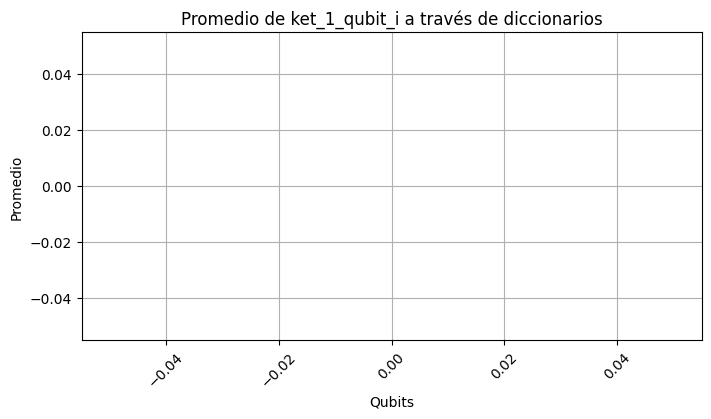

In [ ]:
# Organizar los datos para facilitar el cálculo del promedio
ket_labels = [f'ket_1_qubit_{i}' for i in range(len(dict_states_fidelities[0]))]
promedios = {ket: [] for ket in ket_labels}

for diccionario in dict_states_fidelities:
    for ket, valor in diccionario.items():
        promedios[ket].append(valor)

# Calcular el promedio para cada 'ket_1_qubit_i'
promedios = {ket: sum(valores) / len(valores) for ket, valores in promedios.items()}

# Crear el diagrama de barras
plt.figure(figsize=(8, 4))
plt.grid()
plt.bar(promedios.keys(), promedios.values())
plt.xlabel('Qubits')
plt.ylabel('Promedio')
plt.title('Promedio de ket_1_qubit_i a través de diccionarios')
plt.xticks(rotation=45)

plt.show()

# Introduccion ruido cuantico

## Prueba I

In [ ]:
H = 2*np.pi * 0.1 * sigmax()

In [ ]:
psi0 = basis(2, 0)

times = np.linspace(0.0, 10.0, 100)

In [ ]:
psi0.full()

array([[1.+0.j],
       [0.+0.j]])

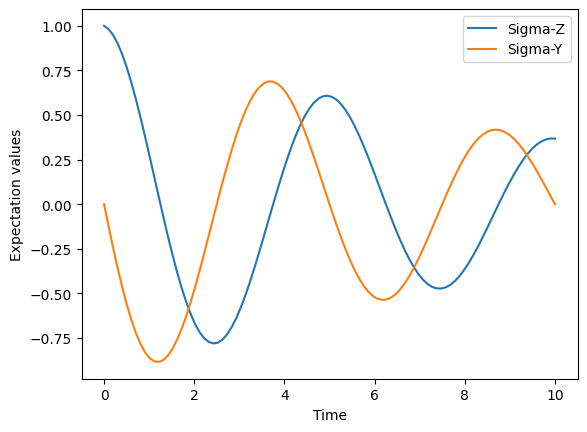

In [ ]:

H = 2*np.pi * 0.1 * sigmax()

psi0 = basis(2, 0)

times = np.linspace(0.0, 10.0, 100)

result = mesolve(H, psi0, times, [np.sqrt(0.05) * sigmax()], [sigmaz(), sigmay()])

fig, ax = plt.subplots()

ax.plot(times, result.expect[0])

ax.plot(times, result.expect[1])

ax.set_xlabel('Time')

ax.set_ylabel('Expectation values')

ax.legend(("Sigma-Z", "Sigma-Y"))

plt.show()

## Prueba II

In [ ]:
from qutip import destroy, create

In [ ]:
a = destroy(2)
print(a)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]


In [ ]:
c = create(3)
print(c)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.41421356 0.        ]]


In [ ]:
print(a.dag())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]


99.95


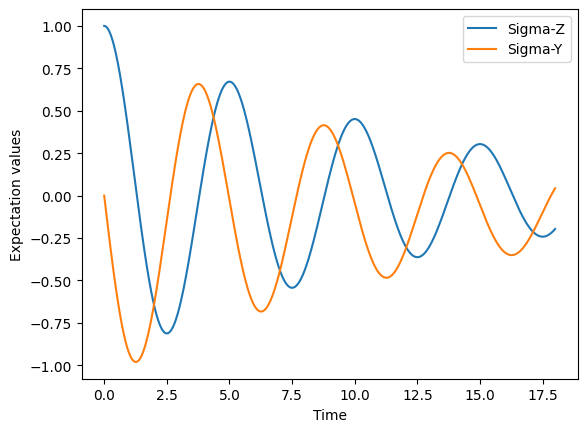

In [ ]:
H = 2*np.pi * 0.1 * sigmax()

psi0 = basis(2, 0)

times = np.linspace(0.0, 18.0, 1000)

T1 = 10

T2 = 0.0100

T2_star = (1/T2) - (1/(2*T1))
print(T2_star)

c1 = a/(np.sqrt(T1))

c2 = a.dag()*a*np.sqrt(2/T2_star)

result = mesolve(H, psi0, times, [c1, c2], [sigmaz(), sigmay()])

fig, ax = plt.subplots()

ax.plot(times, result.expect[0])

ax.plot(times, result.expect[1])

ax.set_xlabel('Time')

ax.set_ylabel('Expectation values')

ax.legend(("Sigma-Z", "Sigma-Y"))

plt.show()

## Prueba III

In [ ]:
def pulse_x(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
  return y


def pulse_z(t, args):
  t_init = args["t_init"]
  t_final = args["t_final"]
  y = np.heaviside((t-t_init), 0.0) * np.heaviside(-(t - t_final), 0.0)
  return y

In [ ]:
class X_pulse:

  def __init__(self, B0, gir, T1, T2):
    self.B0 = B0
    self.gir = gir
    self.h = 1
    self.noise_std = 0
    self.tf_noise = False
    self.T1 = T1
    self.T2 = T2
    self.n_points_pulse_Ri = 100
  def Rx(self, alpha, ket_0, q_obj = 0, tf_expect = True, tf_quantum_noise = True):
    # Estados iniciales y qubit objetivo:
    self.q_obj = q_obj
    self.ket_0 = ket_0
    # parametros de compuerta:
    self.ω_x = self.gir * self.B0
    self.ω_z = self.gir * self.B0
    self.delt_t = (2*np.pi*1)/self.ω_x
    self.B1 = (alpha * 2)/(self.gir * self.delt_t)
    self.O_x = self.gir*(self.B1/2)
    # solucion:
    out = self.Hamiltonian_solve(tf_expect, tf_quantum_noise)
    return out


  def Hamiltonian_solve(self, tf_expect = True, tf_quantum_noise = True):
    # Hamiltonian H0
    h0_constant = - (self.h/2) * (self.ω_x) # + (self.h/2) * (self.ω_z)
    h1_constant =   (self.h/2) * (self.ω_z)
    h2_constant =   (self.h/2) * (self.O_x)
    apply_qbit_z = [sigmaz()]
    apply_qbit_x = [sigmax()]
    H0 = h0_constant * tensor(*apply_qbit_z)
    H1 = h1_constant * tensor(*apply_qbit_z)
    H2 = h2_constant * tensor(*apply_qbit_x)

    # Correccion de desviacion estandar:
    if self.B1 != 0:
      dv = self.noise_std/abs(self.B1)
    else:
      dv = 0
    self.args = { "t_init": 0, "t_final": self.delt_t, "std_noise": dv}
    self.tlist  = np.linspace(0, self.delt_t*10e2, self.n_points_pulse_Ri)
    # Hamiltonian
    if self.tf_noise == False:
      H = [H0, [H1, pulse_z], [H2, pulse_x]]
    else:
      noise_x = pulse_x_with_noise(self.tlist, self.args)
      S_x = Cubic_Spline(self.tlist[0], self.tlist[-1], noise_x)
      H = [H0, [H1, pulse_z], [H2, S_x]]
      # Guardar pulso
    if tf_expect:
      e_ops = [sigmax(), sigmay(), sigmaz()]
    else:
      e_ops = []

    if tf_quantum_noise:
      print("Entro aca")
      T2_star = 1/((1/self.T2) - (1/(2*self.T1)))
      print(T2_star)
      c1 = a/(np.sqrt(self.T1))
      c2 = a.dag()*a*np.sqrt(2/T2_star)
      c_ops = [c1, c2]
    else:
      c_ops = []

    self.output_rwa = mesolve(H, self.ket_0, self.tlist, c_ops, e_ops, self.args)

    return self.output_rwa

In [ ]:
85e-6

8.5e-05

Entro aca
4.08e-06


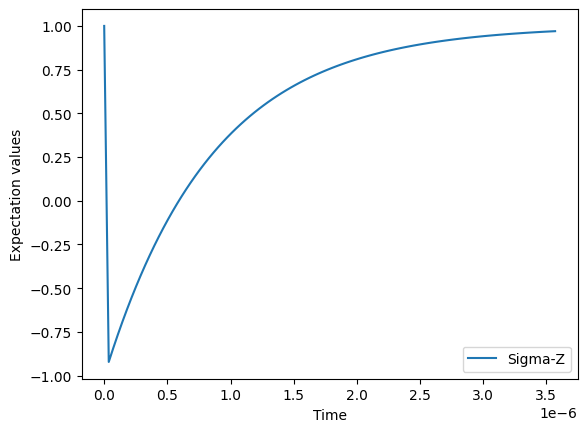

In [ ]:

gir = 1.760e11
B0 = 10e-3
psi0 = basis(2, 0)
m = X_pulse(B0, gir, 85e-8,120e-8)
s = m.Rx(np.pi, psi0)


fig, ax = plt.subplots()

ax.plot(m.tlist, s.expect[2])

ax.set_xlabel('Time')

ax.set_ylabel('Expectation values')

ax.legend(("Sigma-Z", "Sigma-Y"))

plt.show()

In [ ]:
s.expect[2]

array([ 1.        , -0.92154448, -0.84172962, -0.76523   , -0.69190794,
       -0.62163145, -0.55427402, -0.4897144 , -0.42783638, -0.36852858,
       -0.31168424, -0.25720104, -0.20498089, -0.1549298 , -0.10695768,
       -0.06097816, -0.01690849,  0.02533067,  0.06581534,  0.10461841,
        0.14180973,  0.17745623,  0.21162209,  0.24436881,  0.27575534,
        0.30583817,  0.33467145,  0.36230709,  0.38879483,  0.41418236,
        0.43851537,  0.46183766,  0.48419122,  0.50561628,  0.52615141,
        0.54583358,  0.56469822,  0.58277927,  0.6001093 ,  0.61671949,
        0.63263975,  0.64789873,  0.6625239 ,  0.67654159,  0.68997703,
        0.7028544 ,  0.71519689,  0.7270267 ,  0.73836515,  0.74923263,
        0.75964871,  0.76963215,  0.7792009 ,  0.78837219,  0.79716254,
        0.80558777,  0.81366303,  0.82140288,  0.82882124,  0.83593146,
        0.84274635,  0.84927817,  0.85553868,  0.86153914,  0.86729037,
        0.8728027 ,  0.87808608,  0.88314999,  0.88800357,  0.89

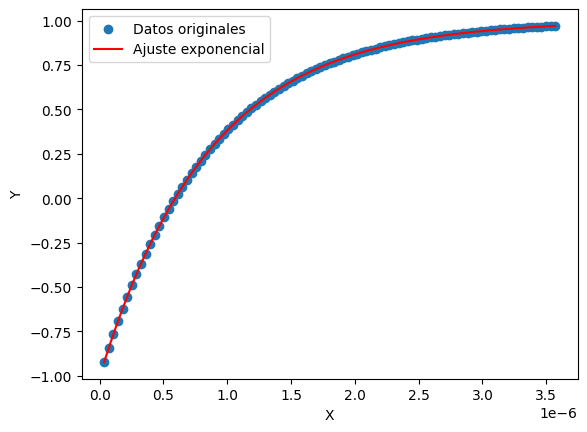

Parámetros del modelo ajustado: a = 2.0048182831717676, b = -1176470.5882351745


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Definir el modelo exponencial
def modelo_exponencial(x, a, b):
    return 1 -  a * np.exp(b * x)

# Generar datos de ejemplo
# Reemplaza estos datos con tu propio arreglo de puntos
x_data = m.tlist[1:]
y_data = s.expect[2][1:]

# Ajustar los datos al modelo exponencial
params, covariance = curve_fit(modelo_exponencial, x_data, y_data)

# Obtener los parámetros del modelo ajustado
a, b = params

# Crear un nuevo conjunto de datos usando el modelo ajustado
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = modelo_exponencial(x_fit, a, b)

# Visualizar los datos originales y el ajuste
plt.scatter(x_data, y_data, label='Datos originales')
plt.plot(x_fit, y_fit, color='red', label='Ajuste exponencial')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Imprimir los parámetros del modelo ajustado
print(f'Parámetros del modelo ajustado: a = {a}, b = {b}')


In [ ]:
1/b

-8.500000000000864e-07

In [ ]:
85e-8

8.5e-07

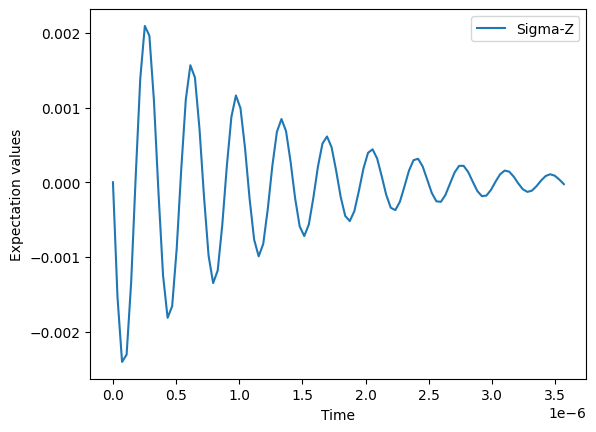

In [ ]:
fig, ax = plt.subplots()

ax.plot(m.tlist, s.expect[0])

ax.set_xlabel('Time')

ax.set_ylabel('Expectation values')

ax.legend(("Sigma-Z", "Sigma-Y"))

plt.show()

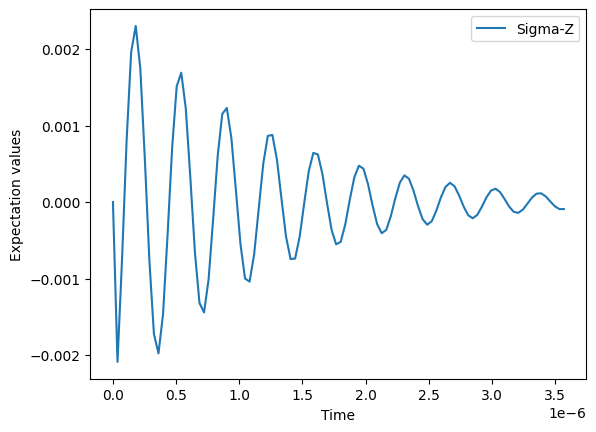

In [ ]:
fig, ax = plt.subplots()

ax.plot(m.tlist, s.expect[1])

ax.set_xlabel('Time')

ax.set_ylabel('Expectation values')

ax.legend(("Sigma-Z", "Sigma-Y"))

plt.show()

## Prueba IV

In [ ]:
gir = 1.760e11
B0 = 0.02
psi0 = basis(2, 0)
m = X_pulse(B0, gir, 9e-6, 14e-6)
s = m.Rx(np.pi, psi0)


fig, ax = plt.subplots()

ax.plot(m.tlist, s.expect[2])

ax.set_xlabel('Time')

ax.set_ylabel('Expectation values')

ax.legend(("Sigma-Z", "Sigma-Y"))

plt.show()

Entro aca
6.299999999999997e-05


AttributeError: 'numpy.float64' object has no attribute 'dag'

Ojo en el eje y, no te dejes joder por el tamañao

Entro aca
7.161290322580645e-06


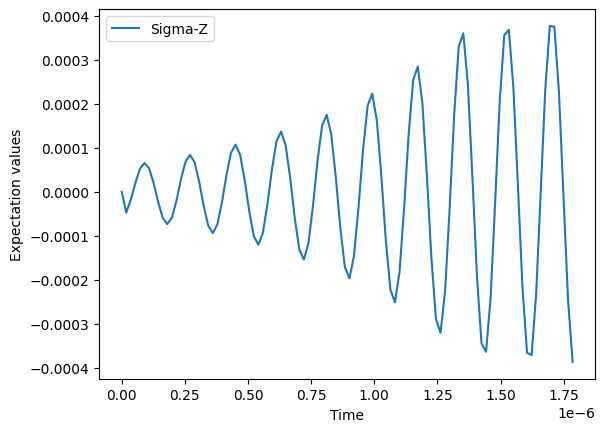

In [ ]:
gir = 1.760e11
B0 = 0.02
psi0 = basis(2, 0)
m = X_pulse(B0, gir, 18.5e-6, 6e-6)
s = m.Rx(np.pi, psi0)


fig, ax = plt.subplots()

ax.plot(m.tlist, s.expect[1])

ax.set_xlabel('Time')

ax.set_ylabel('Expectation values')

ax.legend(("Sigma-Z", "Sigma-Y"))

plt.show()

## Prueba V

In [ ]:
class X_pulse_2:

  def __init__(self, B0, gir, T1, T2):
    self.B0 = B0
    self.gir = gir
    self.h = 1
    self.noise_std = 0
    self.tf_noise = False
    self.T1 = T1
    self.T2 = T2
    self.n_points_pulse_Ri = 100

  def Rx(self, alpha, ket_0, q_obj = 0, tf_expect = True, tf_quantum_noise = True):
    # Estados iniciales y qubit objetivo:
    self.q_obj = q_obj
    self.ket_0 = ket_0
    # parametros de compuerta:
    self.ω_x = self.gir * self.B0
    self.ω_z = self.gir * self.B0
    self.delt_t = (2*np.pi*1)/self.ω_x
    self.B1 = (alpha * 2)/(self.gir * self.delt_t)
    self.O_x = self.gir*(self.B1/2)
    # solucion:
    out = self.Hamiltonian_solve(tf_expect, tf_quantum_noise)
    return out


  def Hamiltonian_solve(self, tf_expect = True, tf_quantum_noise = True):
    # Hamiltonian H0
    h0_constant = - (self.h/2) * (self.ω_x) # + (self.h/2) * (self.ω_z)
    h1_constant =   (self.h/2) * (self.ω_z)
    h2_constant =   (self.h/2) * (self.O_x)
    apply_qbit_z = [sigmaz()]
    apply_qbit_x = [sigmax()]
    H0 = h0_constant * tensor(*apply_qbit_z)
    H1 = h1_constant * tensor(*apply_qbit_z)
    H2 = h2_constant * tensor(*apply_qbit_x)

    # Correccion de desviacion estandar:
    if self.B1 != 0:
      dv = self.noise_std/abs(self.B1)
    else:
      dv = 0
    self.args = { "t_init": 0, "t_final": self.delt_t, "std_noise": dv}
    self.tlist  = np.linspace(0, self.delt_t*10e2, self.n_points_pulse_Ri)
    # Hamiltonian
    if self.tf_noise == False:
      H = [H0, [H1, pulse_z], [H2, pulse_x]]
    else:
      noise_x = pulse_x_with_noise(self.tlist, self.args)
      S_x = Cubic_Spline(self.tlist[0], self.tlist[-1], noise_x)
      H = [H0, [H1, pulse_z], [H2, S_x]]
      # Guardar pulso
    if tf_expect:
      e_ops = [sigmax(), sigmay(), sigmaz()]
    else:
      e_ops = []

    if tf_quantum_noise:
      print("Entro aca")
      T2_star = 1/((1/self.T2) - (1/(2*self.T1)))
      print(T2_star)

      L1 = np.sqrt(1/T2_star)*sigmaz()
      L2 = (np.sqrt(1/T1))*a
      L3 = (np.sqrt(1/T1))*a.dag()

      c_ops = [L1, L2, L3]
    else:
      c_ops = []

    self.output_rwa = mesolve(H, self.ket_0, self.tlist, c_ops, e_ops, self.args)

    return self.output_rwa

In [ ]:
c = a.dag()*a
print(c)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]


In [ ]:
print(a)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]


In [ ]:
print(a.dag())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]


Entro aca
6.300000000000002e-07


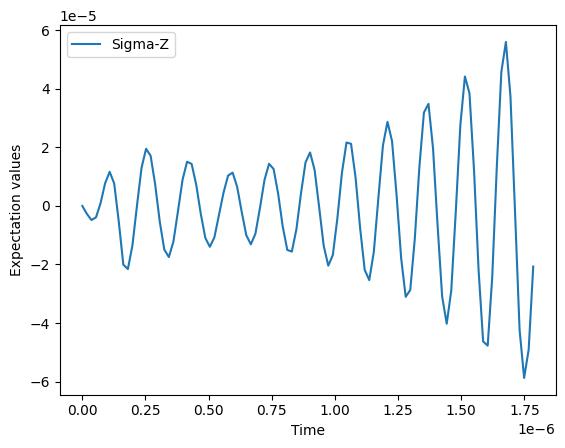

In [ ]:
gir = 1.760e11
B0 = 0.02
psi0 = basis(2, 0)
m = X_pulse_2(B0, gir, 9e-8, 14e-8)
s = m.Rx(np.pi, psi0)


fig, ax = plt.subplots()

ax.plot(m.tlist, s.expect[0])

ax.set_xlabel('Time')

ax.set_ylabel('Expectation values')

ax.legend(("Sigma-Z", "Sigma-Y"))

plt.show()